# Retail Store Customer Churn and Segmentation Analysis

### Features

- CustomerID: Unique customer ID
- Churn: Churn Flag
- Tenure: Tenure of customer in organization
- PreferredLoginDevice: Preferred login device of customer
- CityTier: City tier
- WarehouseToHome: Distance in between warehouse to home of customer
- PreferredPaymentMode: Preferred payment method of customer
- Gender: Gender of customer
- HourSpendOnApp: Number of hours spend on mobile application or website
- NumberOfDeviceRegistered: Total number of deceives is registered on particular customer
- PreferedOrderCat: Preferred order category of customer in last month
- SatisfactionScore: Satisfactory score of customer on service
- MaritalStatus: Marital status of customer
- NumberOfAddress: Total number of added added on particular customer
- Complain: Any complaint has been raised in last month
- OrderAmountHikeFromlastYear: Percentage increases in order from last year
- CouponUsed: Total number of coupon has been used in last month
- OrderCount: Total number of orders has been places in last month
- DaySinceLastOrder: Day Since last order by customer
- CashbackAmount: Average cashback in last month

### Objectives:

#### Identify customer churn patterns:
- Perform exploratory data analysis to understand the relationships between customer demographics, purchase behavior, and churn.
- Apply clustering techniques to segment the customer base into distinct groups.
- Consider features such as purchase frequency, purchase amount, and customer demographics for segmentation.
- Analyze the characteristics of each segment and provide descriptive insights about their behavior.

#### Predictive Modeling:
- Build a predictive model to forecast customer churn using machine learning algorithms (e.g.,logistic regression, random forest, or gradient boosting).
- Evaluate the model's performance using appropriate metrics.

#### Implementation Plan:
- Based on the insights from customer churn and segmentation analyses, propose customer retention strategies tailored to each segment.
- Develop an implementation plan for the suggested retention strategies, including a timeline and key performance indicators to measure their success.

## Data Loading and Inspecting

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_csv('E Commerce Dataset.csv')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [6]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.221492  
std       2.939680           3.654433       49.193869  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           3.000000      163.000000  
75%       3.000000           7.000000      196.000000  
max      16.000000          46.000000      325.000000

- features like Churn, City Tier have an improper 25%-50%-75% distribution because they are Categorical
- 75% customers have a tenure less than 16 months

In [7]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
dtype: int64

In [8]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [9]:
df['Churn'].value_counts() # Target Variable

Churn
0    4682
1     948
Name: count, dtype: int64

- 4682 instances of the "0" class (non-churn) and only 948 instances of the "1" class (churn). This means that the "0" class is significantly more than the "1" class.
- Indication of a highly imbalanced dataset

In [10]:
# Value counts of Categorical cols

for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode

the values are:
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender

the values are:
Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat

the values are:
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus

the values are:
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64




In [11]:
# As mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [12]:
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In [13]:
# As cod is also cash on delievery and as CC is also credit card, merging them

df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [14]:
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

## Data Cleaning and Preprocessing

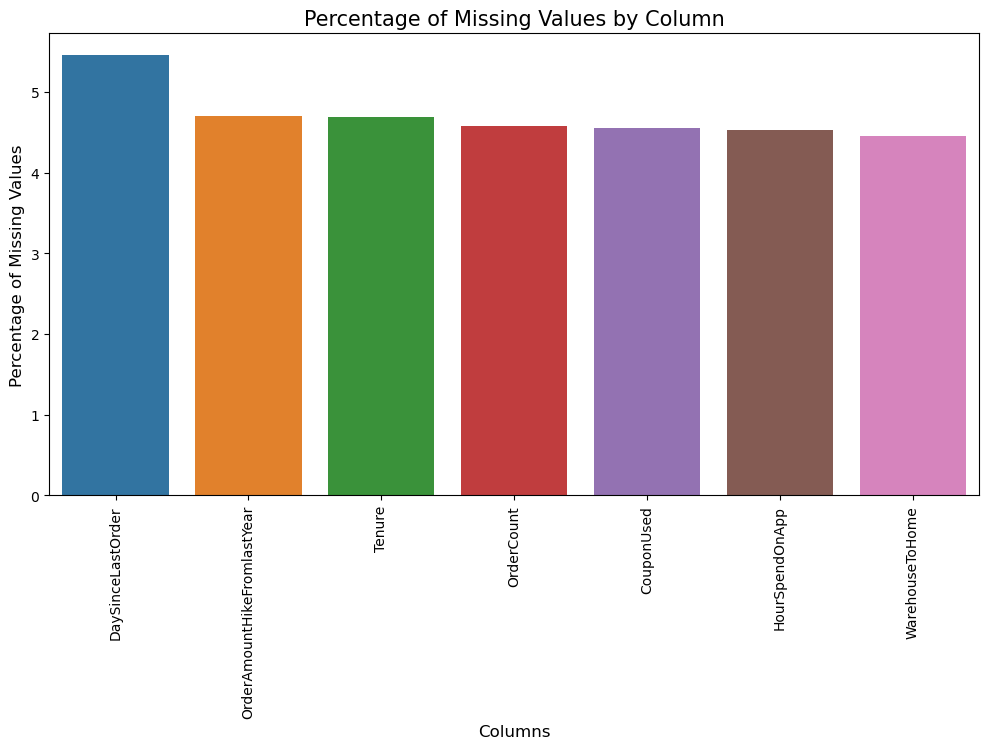

In [15]:
# Calculate the percentage of missing values for each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Filter out columns with no missing values
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

# Sort the columns by the percentage of missing values in descending order
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage of Missing Values', fontsize=12)
plt.title('Percentage of Missing Values by Column', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [16]:
# List of features to fill with median
features_to_fill = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                    'OrderAmountHikeFromlastYear', 'CouponUsed', 
                    'OrderCount', 'DaySinceLastOrder']

# Fill missing values with the median for each feature
for feature in features_to_fill:
    df[feature].fillna(df[feature].median(), inplace=True)

print(df.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [17]:
df.drop(columns=['CustomerID'], inplace=True)

### Outlier Detection and Handling

In [18]:
num_features = [col for col in df.columns if df[col].dtype != 'O' and col not in ['Churn']]
num_df = df[num_features]
num_df.head()

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0     4.0         3              6.0             3.0   
1     9.0         1              8.0             3.0   
2     9.0         1             30.0             2.0   
3     0.0         3             15.0             2.0   
4     0.0         1             12.0             3.0   

   NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                         3                  2                9         1   
1                         4                  3                7         1   
2                         4                  3                6         1   
3                         4                  5                8         0   
4                         3                  5                3         0   

   OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                         11.0         1.0         1.0                5.0   
1                         15.0         0.0         1.0                0.0   
2                         14.0         0.0         1.0                3.0   
3                         23.0         0.0         1.0                3.0   
4                         11.0         1.0         1.0                3.0   

   CashbackAmount  
0             160  
1             121  
2             120  
3             134  
4             130

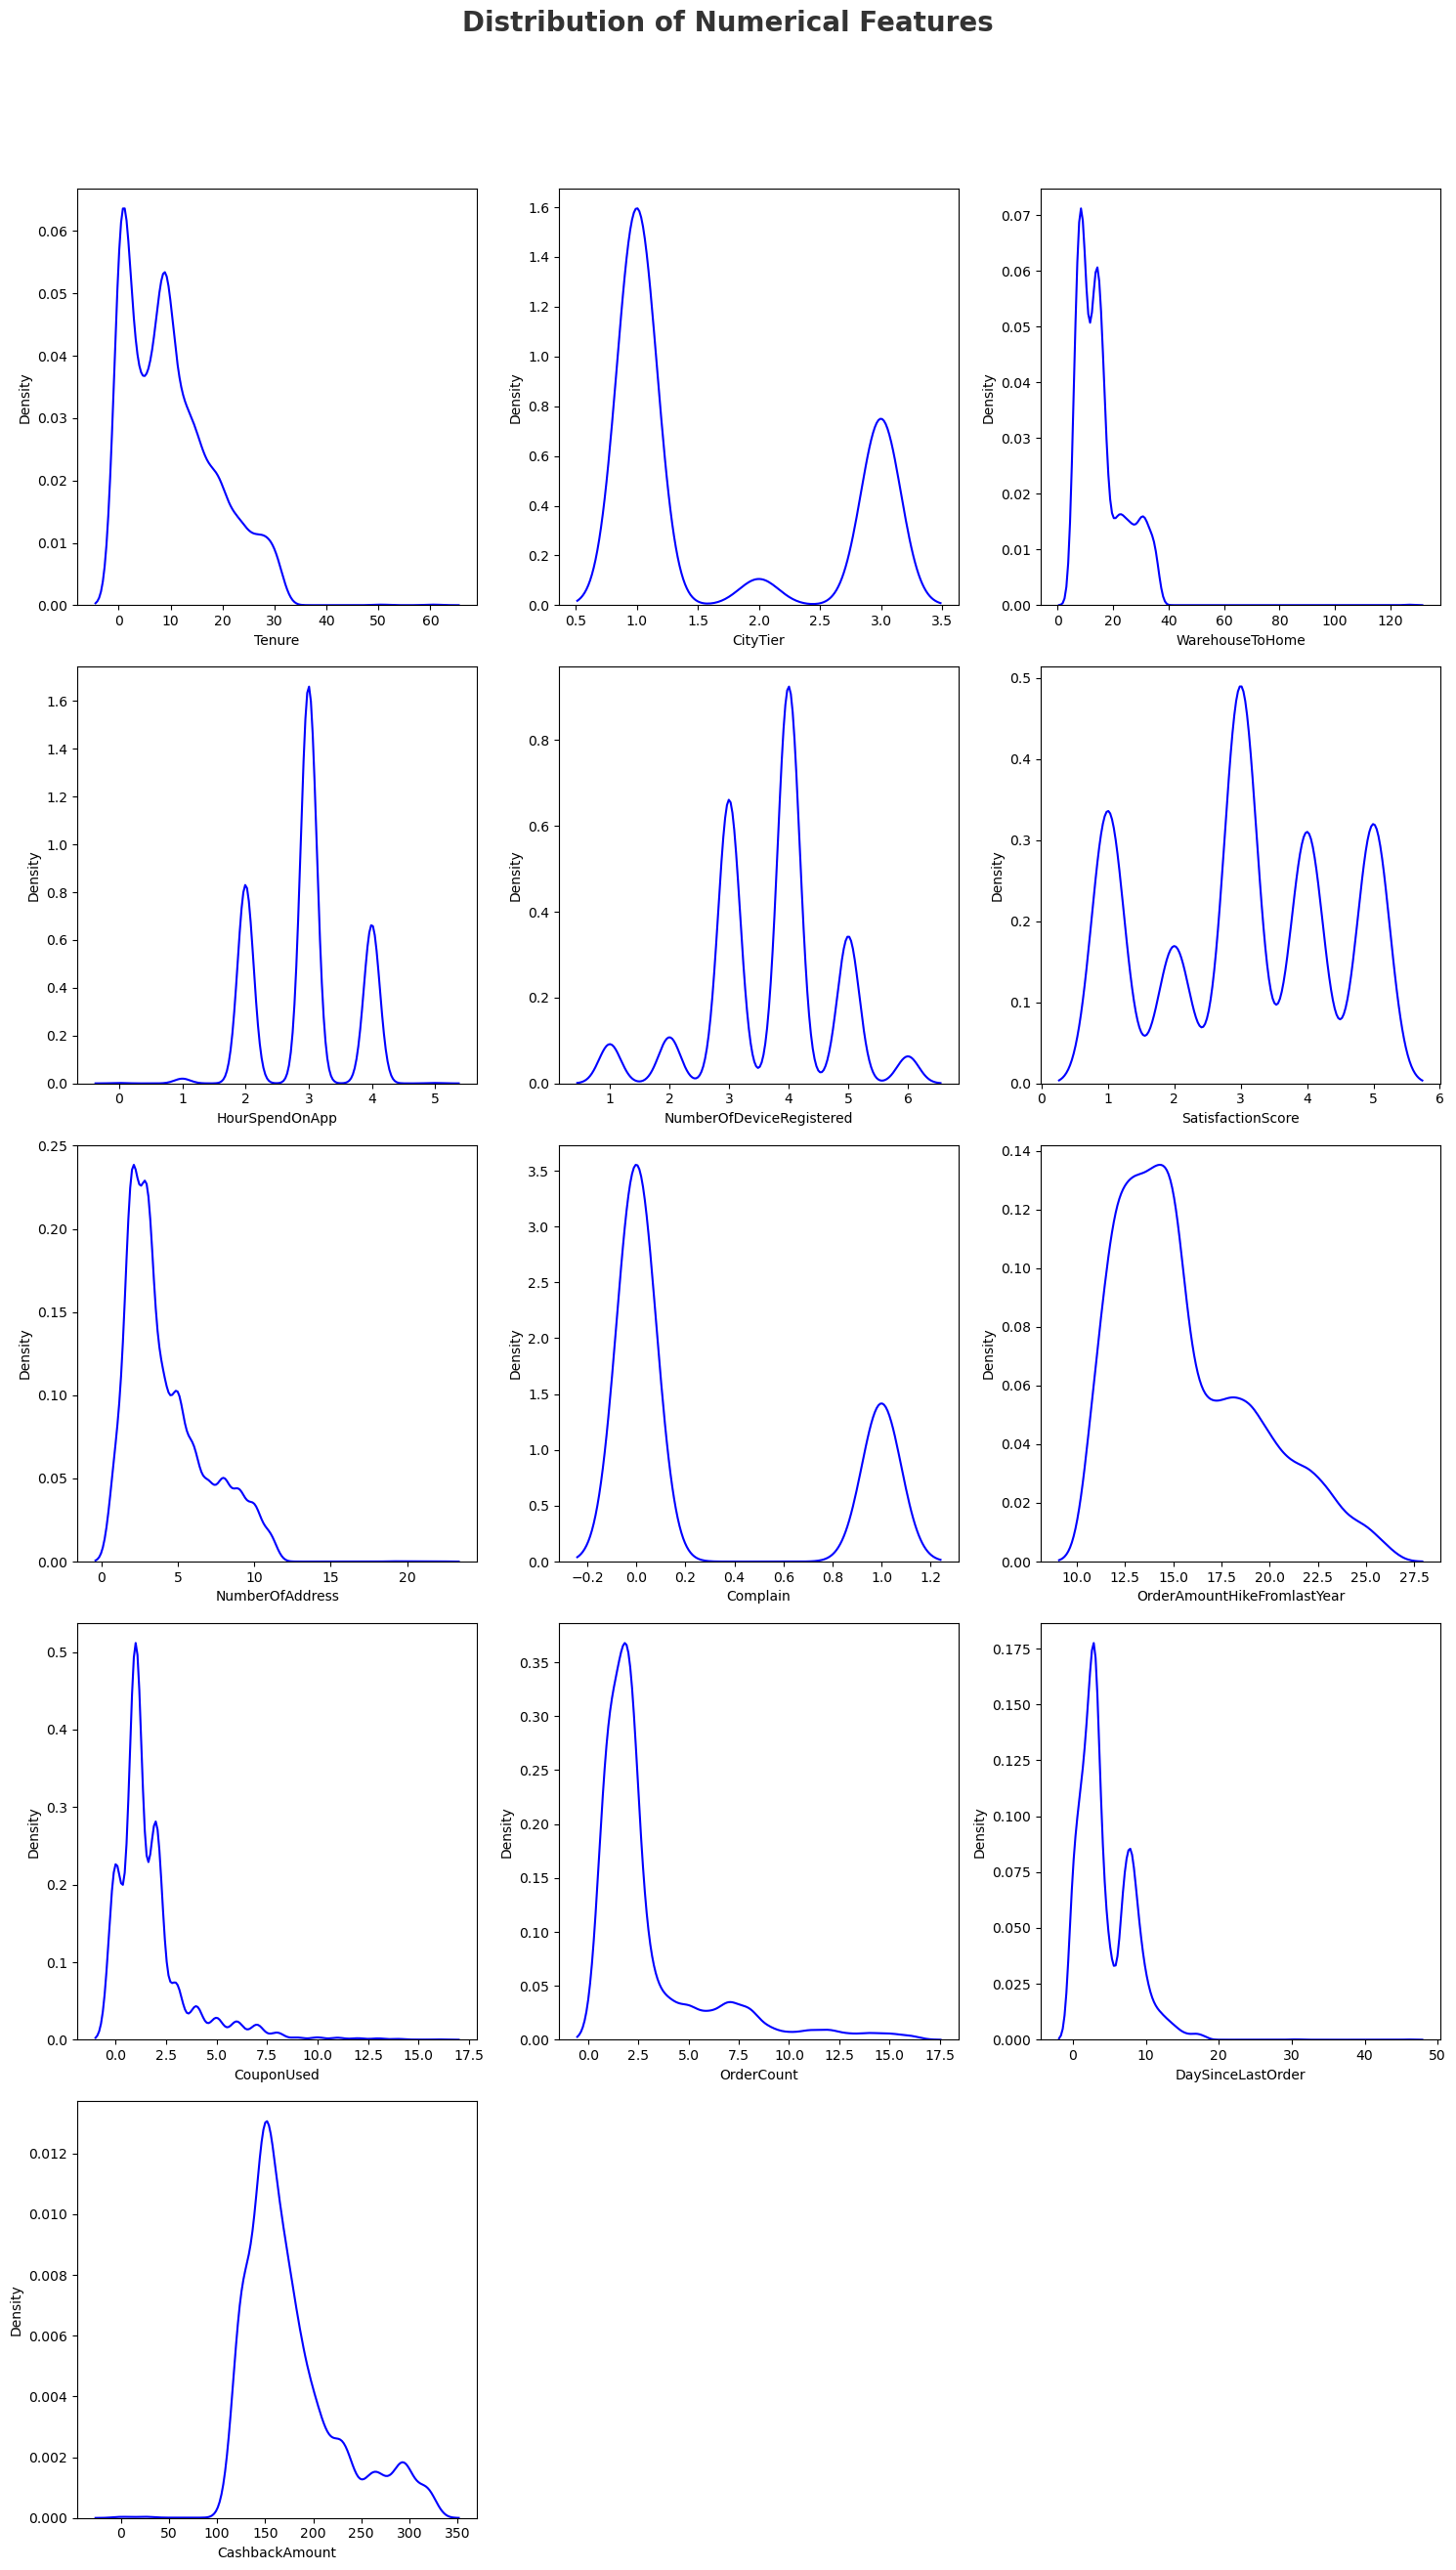

In [19]:
# Number of numerical features
num_numeric_features = len(num_features)

# Calculate the number of rows and columns needed
n_cols = 3
n_rows = (num_numeric_features // n_cols) + (num_numeric_features % n_cols > 0)

plt.figure(figsize=(15, 5 * n_rows))
plt.suptitle('Distribution of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.05)

# Plot each numerical feature
for i in range(num_numeric_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(x=num_df[num_features[i]], color='blue')
    plt.xlabel(num_features[i])
    plt.tight_layout()

plt.show()

In [20]:
obj = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
x = df.drop(obj,axis = 1)
for i in x.columns:
    count_outliers(x,i)

There are outliers in Churn
Count of outliers are: 948
There are outliers in Tenure
Count of outliers are: 4
No outliers in CityTier
There are outliers in WarehouseToHome
Count of outliers are: 2
There are outliers in HourSpendOnApp
Count of outliers are: 6
There are outliers in NumberOfDeviceRegistered
Count of outliers are: 397
No outliers in SatisfactionScore
There are outliers in NumberOfAddress
Count of outliers are: 4
No outliers in Complain
There are outliers in OrderAmountHikeFromlastYear
Count of outliers are: 33
There are outliers in CouponUsed
Count of outliers are: 629
There are outliers in OrderCount
Count of outliers are: 703
There are outliers in DaySinceLastOrder
Count of outliers are: 62
There are outliers in CashbackAmount
Count of outliers are: 447


In [21]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df[col] = np.where(df[col]>upper_limit, upper_limit, np.where(df[col]<lower_limit,lower_limit,df[col]))
    return df[df[col] > upper_limit]

In [22]:
remove_outliers_IQR('Tenure')

percentile25 3.0
percentile75 15.0
Upper limit 33.0
Lower limit -15.0


Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [23]:
remove_outliers_IQR('WarehouseToHome')

percentile25 9.0
percentile75 20.0
Upper limit 36.5
Lower limit -7.5


Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [24]:
remove_outliers_IQR('HourSpendOnApp')

percentile25 2.0
percentile75 3.0
Upper limit 4.5
Lower limit 0.5


Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [25]:
remove_outliers_IQR('NumberOfDeviceRegistered')

percentile25 3.0
percentile75 4.0
Upper limit 5.5
Lower limit 1.5


Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [26]:
remove_outliers_IQR('NumberOfAddress')

percentile25 2.0
percentile75 6.0
Upper limit 12.0
Lower limit -4.0


Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [27]:
remove_outliers_IQR('OrderAmountHikeFromlastYear')

percentile25 13.0
percentile75 18.0
Upper limit 25.5
Lower limit 5.5


Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [28]:
remove_outliers_IQR('CouponUsed')

percentile25 1.0
percentile75 2.0
Upper limit 3.5
Lower limit -0.5


Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [29]:
remove_outliers_IQR('OrderCount')

percentile25 1.0
percentile75 3.0
Upper limit 6.0
Lower limit -2.0


Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [30]:
remove_outliers_IQR('DaySinceLastOrder')

percentile25 2.0
percentile75 7.0
Upper limit 14.5
Lower limit -5.5


Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [31]:
remove_outliers_IQR('CashbackAmount')

percentile25 146.0
percentile75 196.0
Upper limit 271.0
Lower limit 71.0


Empty DataFrame
Columns: [Churn, Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount]
Index: []

In [32]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

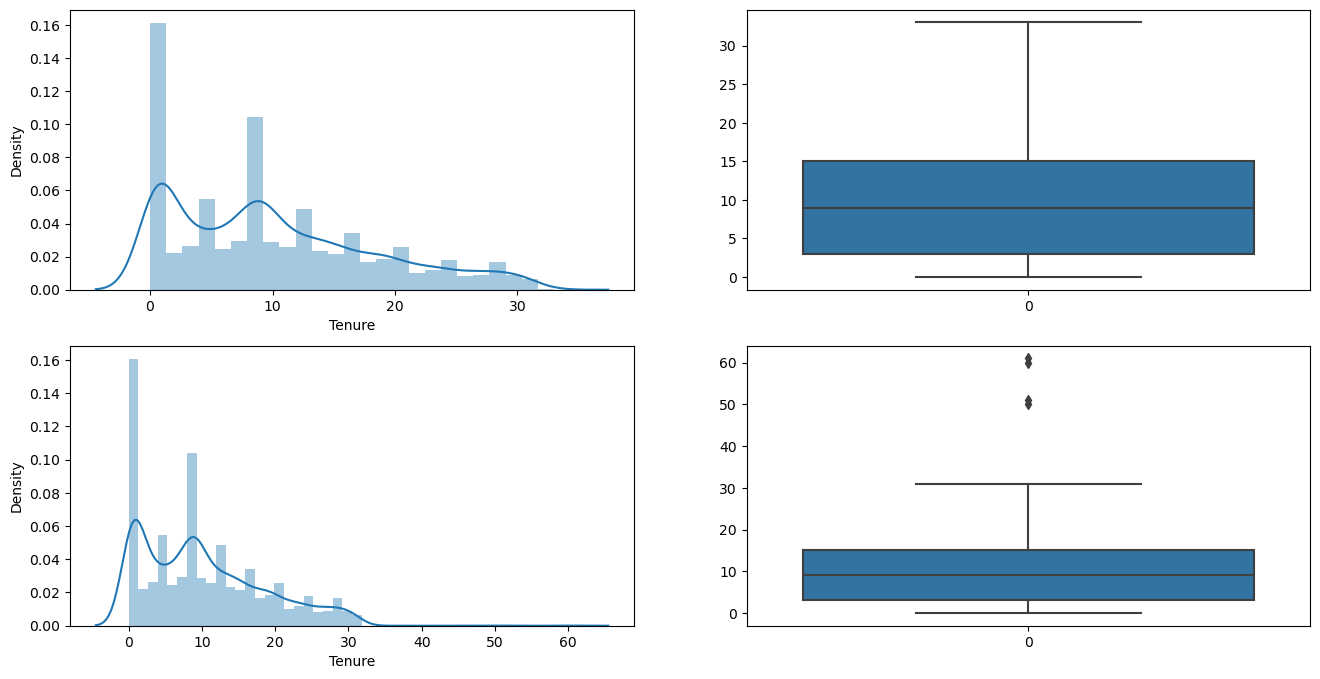

In [33]:
create_comparison_plot(df,df1,"Tenure")

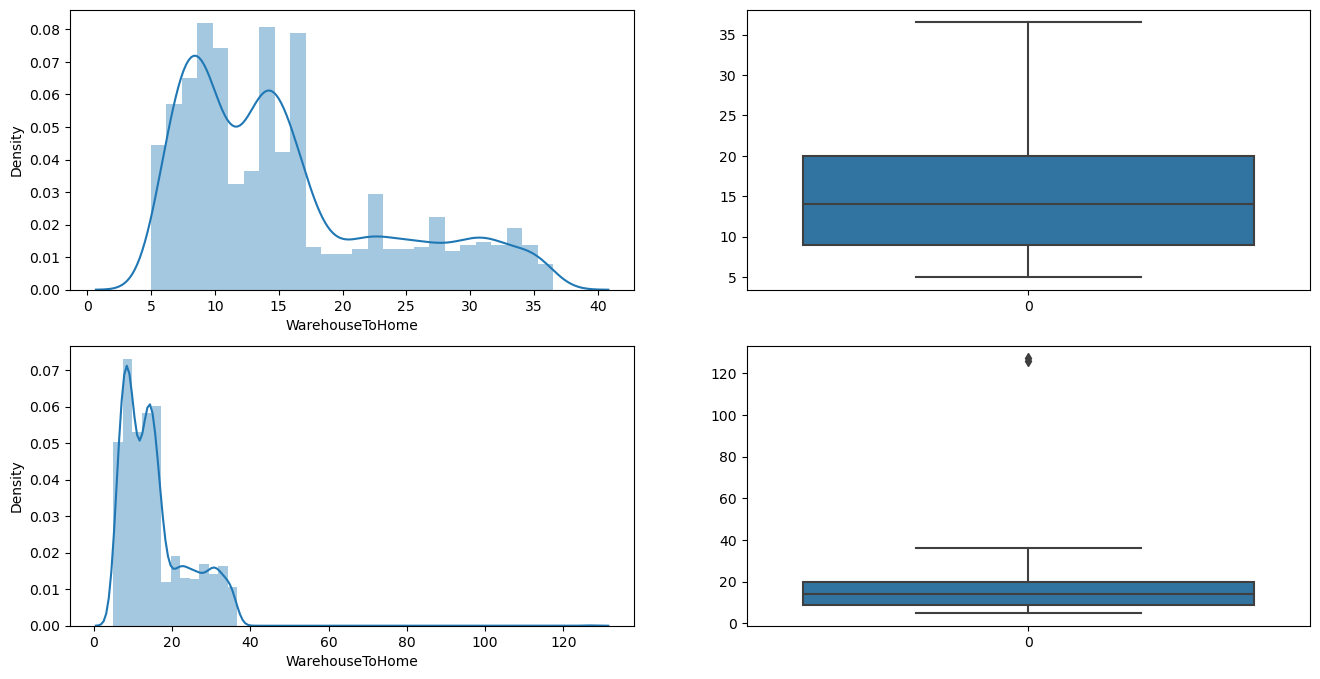

In [34]:
create_comparison_plot(df,df1,"WarehouseToHome")

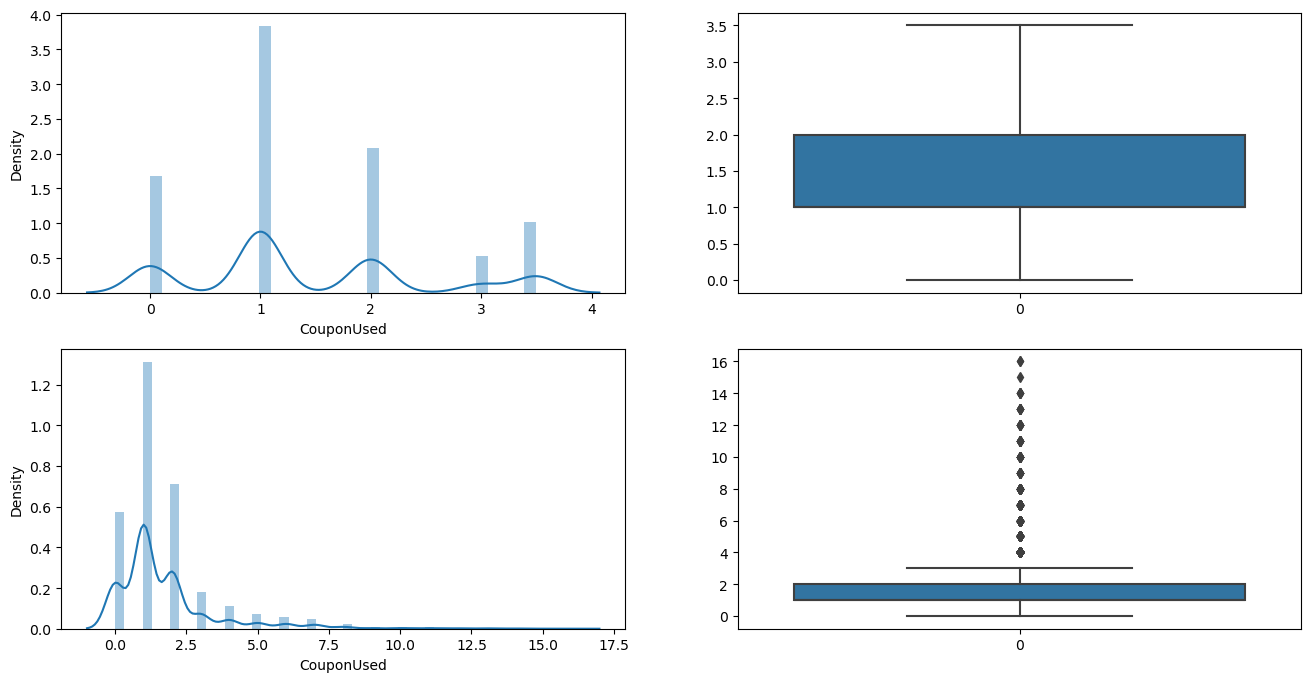

In [35]:
create_comparison_plot(df,df1,"CouponUsed")

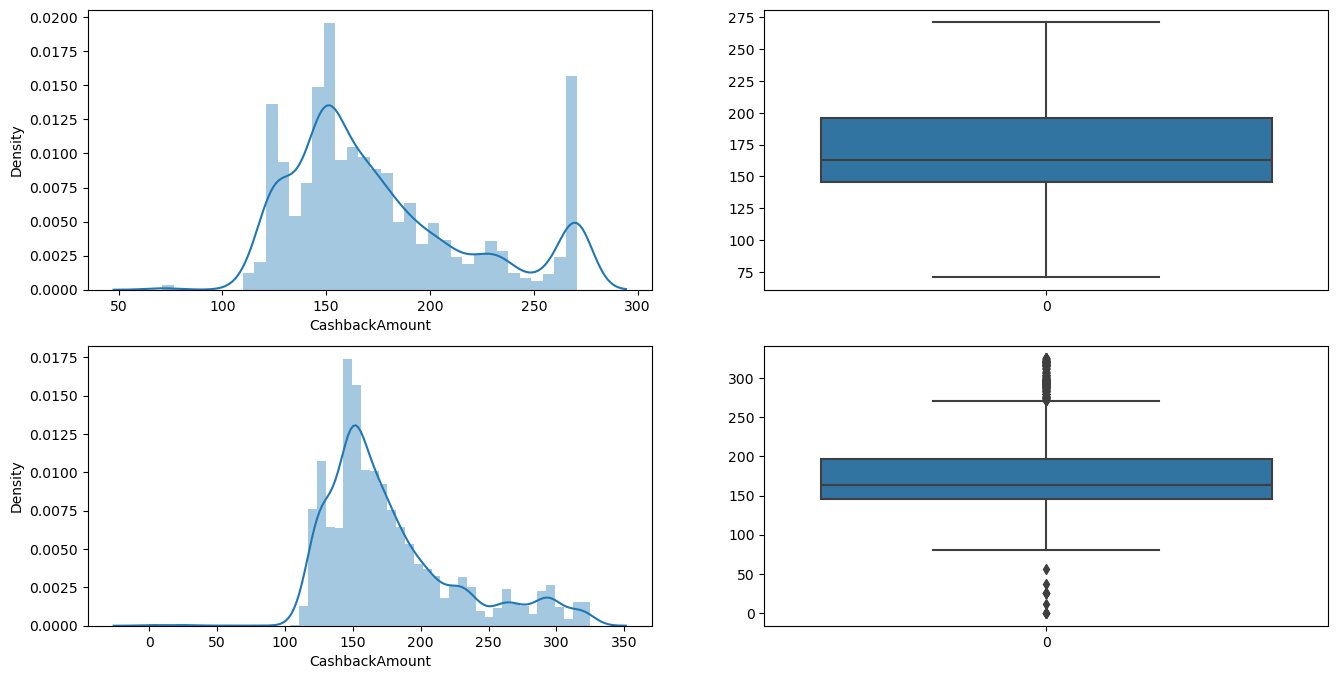

In [36]:
create_comparison_plot(df,df1,'CashbackAmount')

## Feature Engineering

In [467]:
# Creating a new feature HoursSpentOnApp_OrderCount_Ratio
df['HoursSpentOnApp_OrderCount_Ratio'] = df['HourSpendOnApp'] / df['OrderCount']

In [468]:
df.head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1     9.0         Mobile Phone         1              8.0   
2      1     9.0         Mobile Phone         1             30.0   
3      1     0.0         Mobile Phone         3             15.0   
4      1     0.0         Mobile Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                       3.0   
1                  UPI    Male             3.0                       4.0   
2           Debit Card    Male             2.0                       4.0   
3           Debit Card    Male             2.0                       4.0   
4          Credit Card    Male             3.0                       3.0   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single              9.0   
1        Mobile Phone                  3        Single              7.0   
2        Mobile Phone                  3        Single              6.0   
3  Laptop & Accessory                  5        Single              8.0   
4        Mobile Phone                  5        Single              3.0   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  HoursSpentOnApp_OrderCount_Ratio  
0                5.0           160.0                               3.0  
1                0.0           121.0                               3.0  
2                3.0           120.0                               2.0  
3                3.0           134.0                               2.0  
4                3.0           130.0                               3.0

## Exploratory Data Analysis

### Univariate, Bi-Variate and  Multivariate  Analysis


## Univariate Analysis

#### Categorical cols

- Checking the distribution of the Categorical variables with respect to the Churn Status

In [469]:
# Check data types
print(df.dtypes)

Churn                                 int64
Tenure                              float64
PreferredLoginDevice                 object
CityTier                              int64
WarehouseToHome                     float64
PreferredPaymentMode                 object
Gender                               object
HourSpendOnApp                      float64
NumberOfDeviceRegistered            float64
PreferedOrderCat                     object
SatisfactionScore                     int64
MaritalStatus                        object
NumberOfAddress                     float64
Complain                              int64
OrderAmountHikeFromlastYear         float64
CouponUsed                          float64
OrderCount                          float64
DaySinceLastOrder                   float64
CashbackAmount                      float64
HoursSpentOnApp_OrderCount_Ratio    float64
dtype: object


In [470]:
df['Churn'].value_counts()

Churn
0    4682
1     948
Name: count, dtype: int64

### Prefered Login Device

Churn                    0    1
PreferredLoginDevice           
Computer              1310  324
Mobile Phone          3372  624
--------------------------------------------------------


<Figure size 800x600 with 0 Axes>

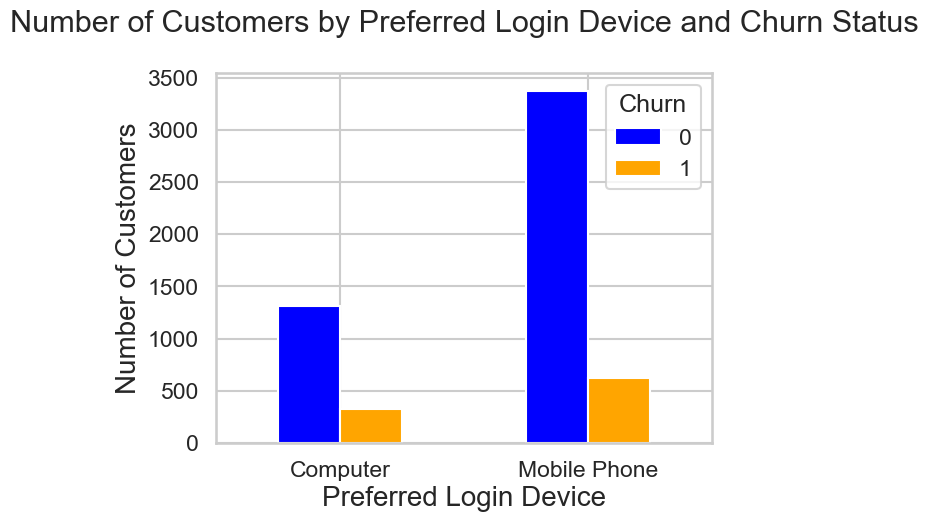

In [471]:
churn_by_device = pd.crosstab(df['PreferredLoginDevice'], df['Churn'])
print(churn_by_device)

print("--------------------------------------------------------")

# Create a bar chart
plt.figure(figsize=(8, 6))
churn_by_device.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Preferred Login Device')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Preferred Login Device and Churn Status')
plt.xticks(rotation=0)
plt.show()

### CityTier

Churn        0    1
CityTier           
1         3134  532
2          194   48
3         1354  368
--------------------------------------------------------


<Figure size 800x600 with 0 Axes>

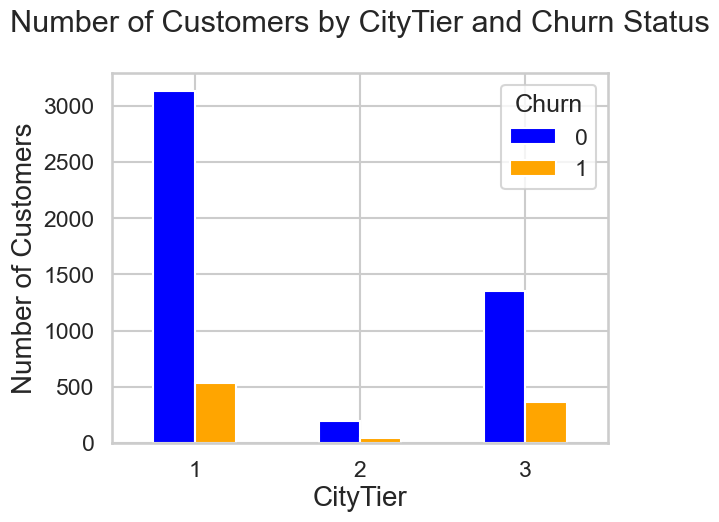

In [472]:
churn_by_CityTier = pd.crosstab(df['CityTier'], df['Churn'])
print(churn_by_CityTier)

print("--------------------------------------------------------")

# Create a bar chart
plt.figure(figsize=(8, 6))
churn_by_CityTier.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('CityTier')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by CityTier and Churn Status')
plt.xticks(rotation=0)
plt.show()

### PreferredPaymentMode

Churn                    0    1
PreferredPaymentMode           
Cash on Delivery       386  128
Credit Card           1522  252
Debit Card            1958  356
E wallet               474  140
UPI                    342   72
--------------------------------------------------------


<Figure size 800x600 with 0 Axes>

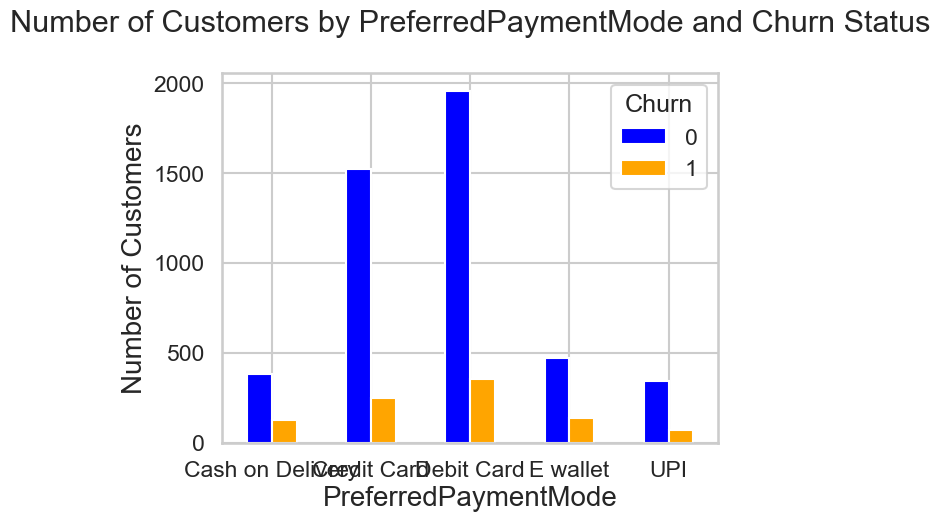

In [473]:
churn_by_PreferredPaymentMode = pd.crosstab(df['PreferredPaymentMode'], df['Churn'])
print(churn_by_PreferredPaymentMode)

print("--------------------------------------------------------")

# Create a bar chart
plt.figure(figsize=(8, 6))
churn_by_PreferredPaymentMode.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('PreferredPaymentMode')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by PreferredPaymentMode and Churn Status')
plt.xticks(rotation=0)
plt.show()

### Gender

Churn      0    1
Gender           
Female  1898  348
Male    2784  600
--------------------------------------------------------


<Figure size 800x600 with 0 Axes>

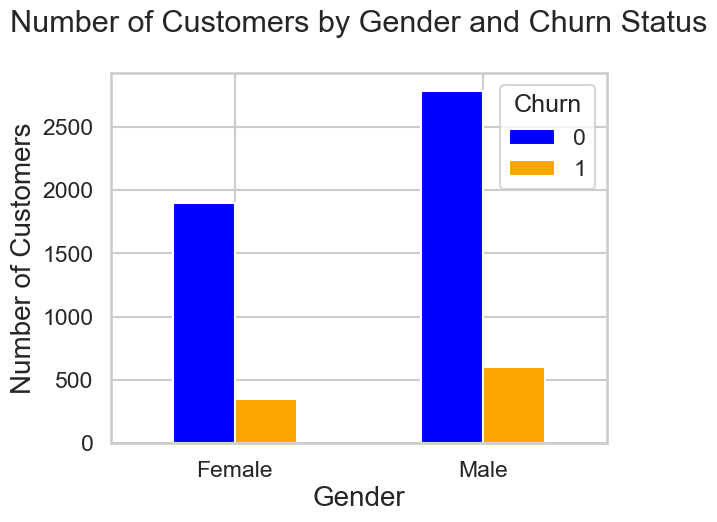

In [474]:
churn_by_Gender = pd.crosstab(df['Gender'], df['Churn'])
print(churn_by_Gender)

print("--------------------------------------------------------")

# Create a bar chart
plt.figure(figsize=(8, 6))
churn_by_Gender.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Gender and Churn Status')
plt.xticks(rotation=0)
plt.show()

- Looking at the total churn (adding corresponding values in each gender), there are more male churned customers (600) compared to females (348).
- A higher churn rate for a particular gender might indicate that the store needs to tailor its marketing strategies or customer service approaches to better retain customers from that group.

### PreferedOrderCat

Churn                  0    1
PreferedOrderCat             
Fashion              698  128
Grocery              390   20
Laptop & Accessory  1840  210
Mobile Phone        1510  570
Others               244   20
--------------------------------------------------------


<Figure size 800x600 with 0 Axes>

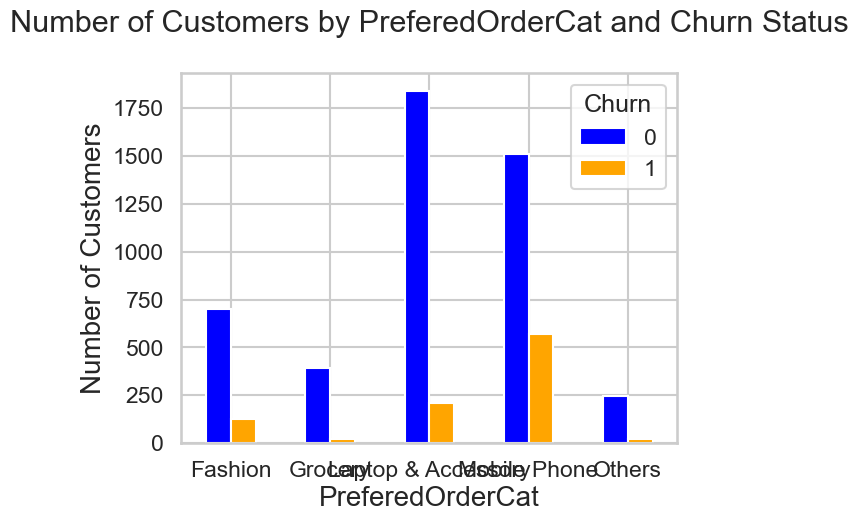

In [475]:
churn_by_PreferedOrderCat = pd.crosstab(df['PreferedOrderCat'], df['Churn'])
print(churn_by_PreferedOrderCat)

print("--------------------------------------------------------")

# Create a bar chart
plt.figure(figsize=(8, 6))
churn_by_PreferedOrderCat.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('PreferedOrderCat')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by PreferedOrderCat and Churn Status')
plt.xticks(rotation=0)
plt.show()

### MaritalStatus

Churn             0    1
MaritalStatus           
Divorced        724  124
Married        2642  344
Single         1316  480
--------------------------------------------------------


<Figure size 800x600 with 0 Axes>

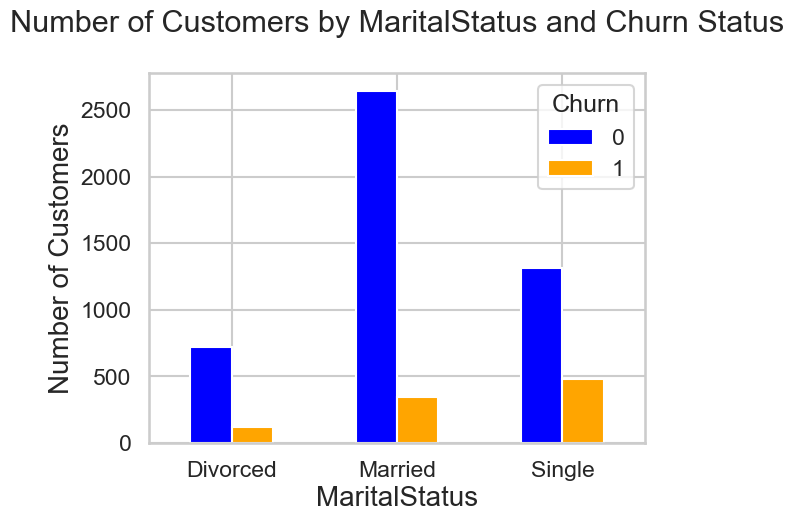

In [476]:
churn_by_MaritalStatus = pd.crosstab(df['MaritalStatus'], df['Churn'])
print(churn_by_MaritalStatus)

print("--------------------------------------------------------")

# Create a bar chart
plt.figure(figsize=(8, 6))
churn_by_MaritalStatus.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('MaritalStatus')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by MaritalStatus and Churn Status')
plt.xticks(rotation=0)
plt.show()

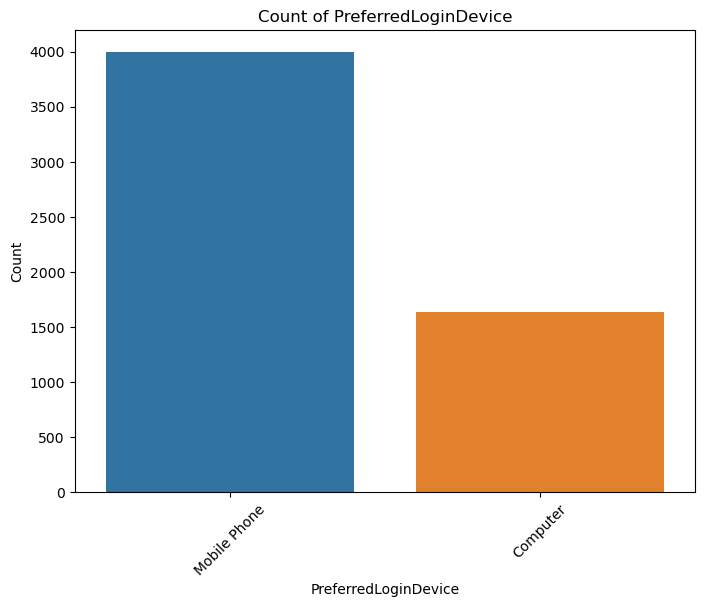

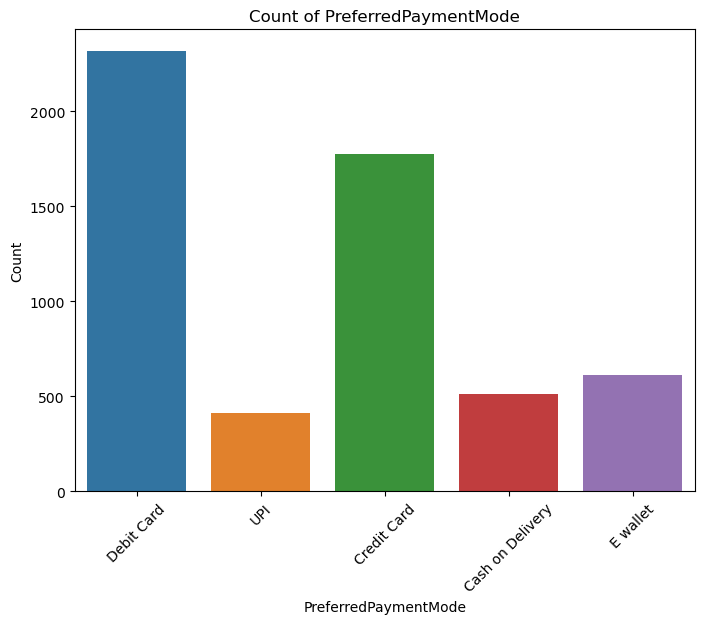

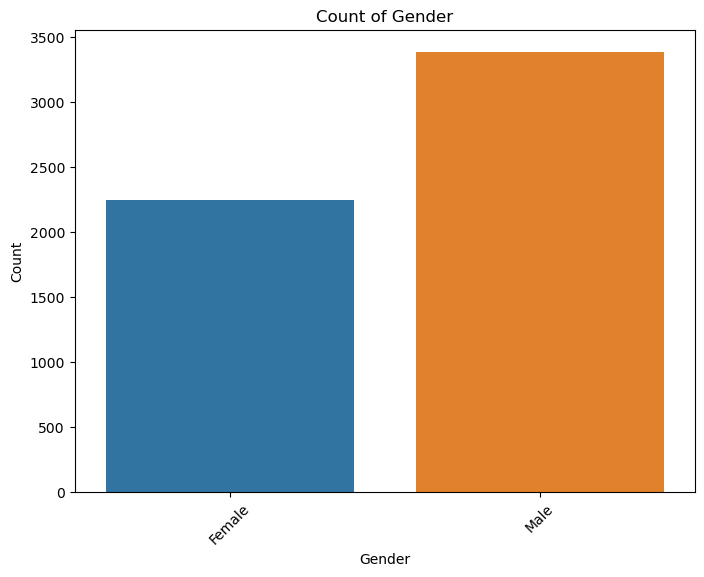

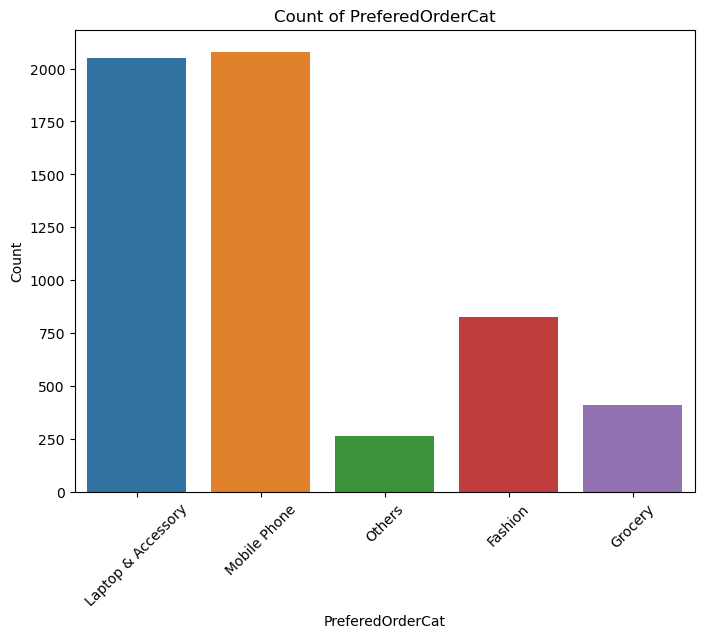

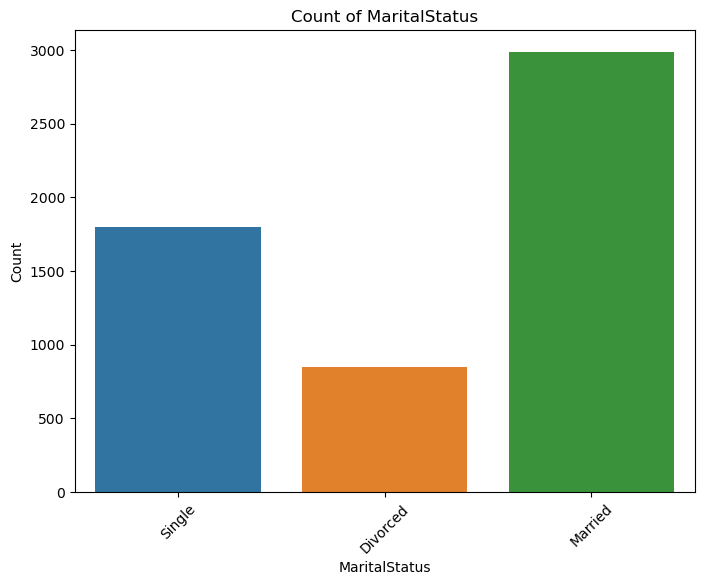

In [40]:
for col in df.columns:
    if df[col].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Count of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.show()

### Numerical cols

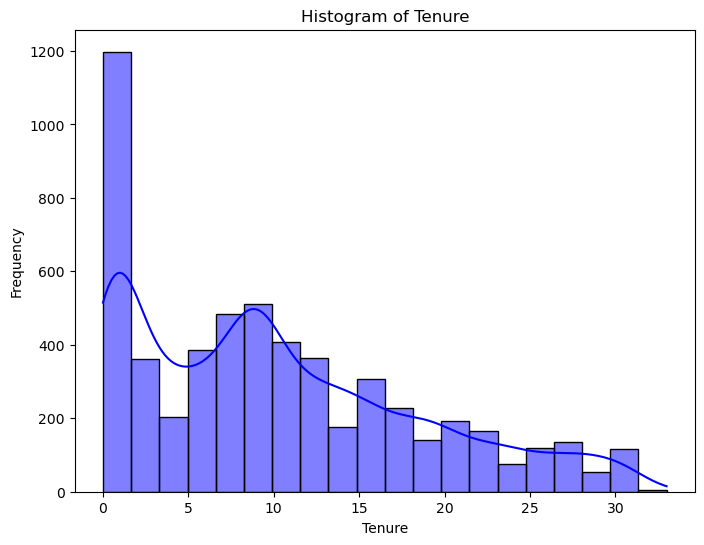

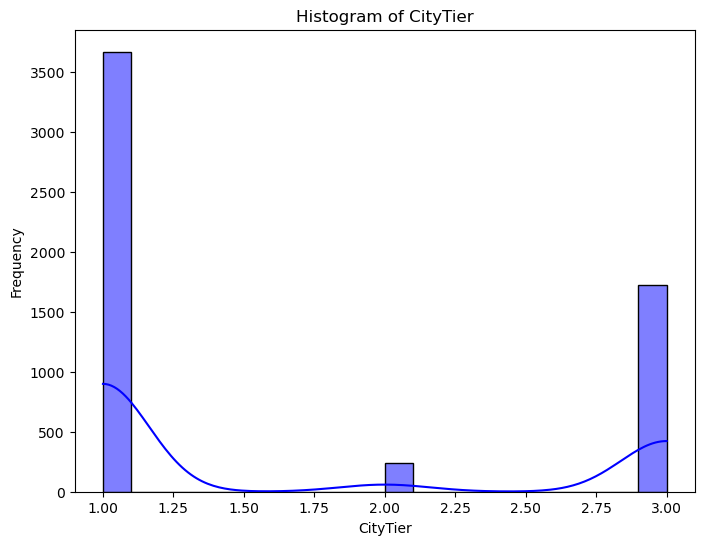

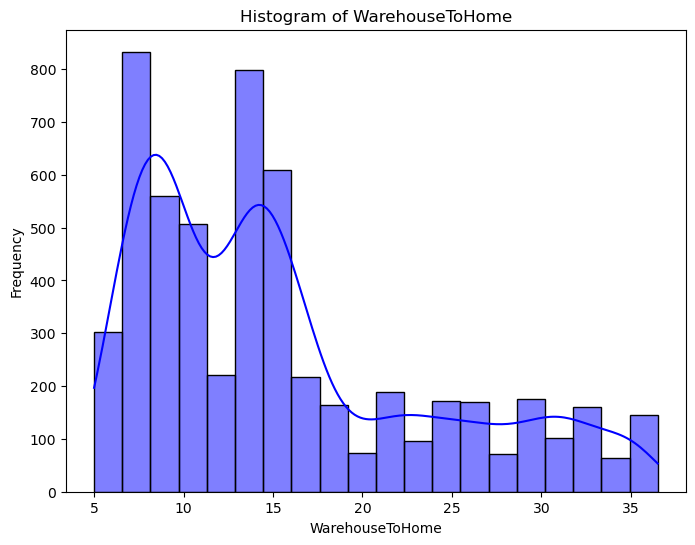

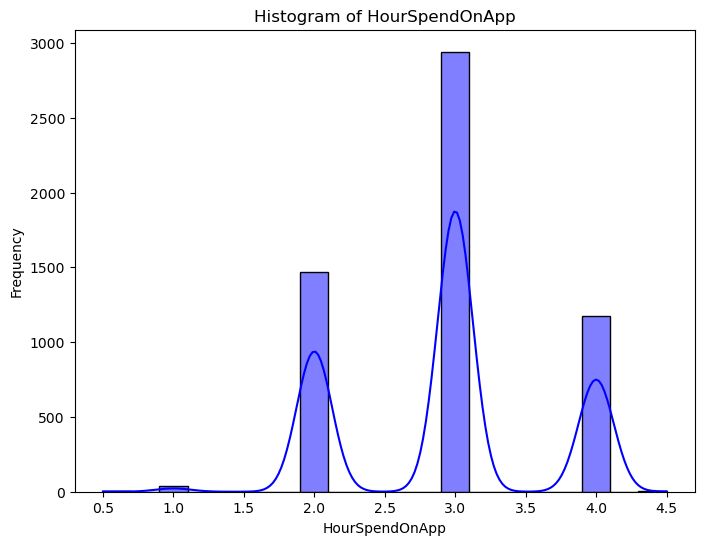

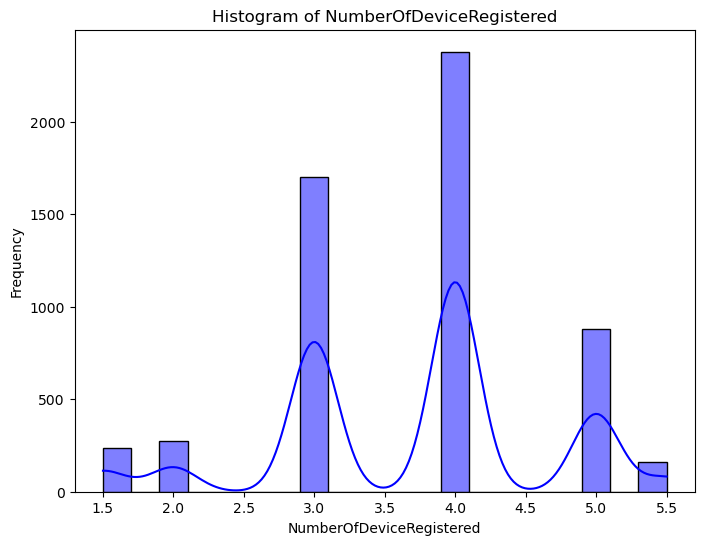

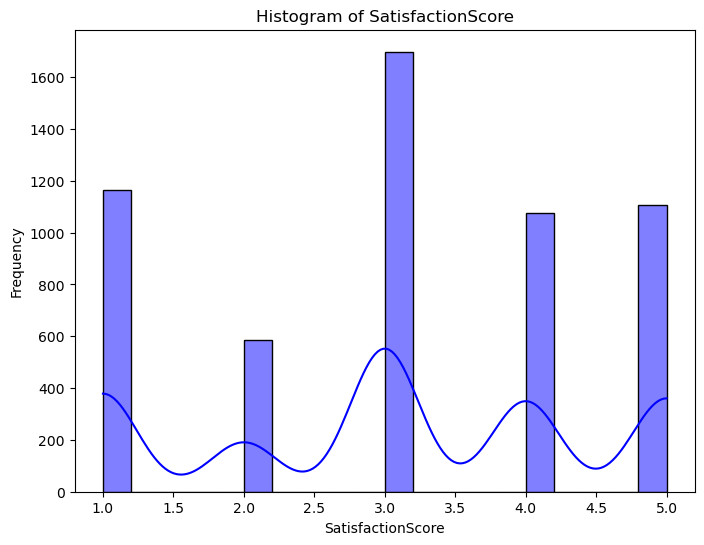

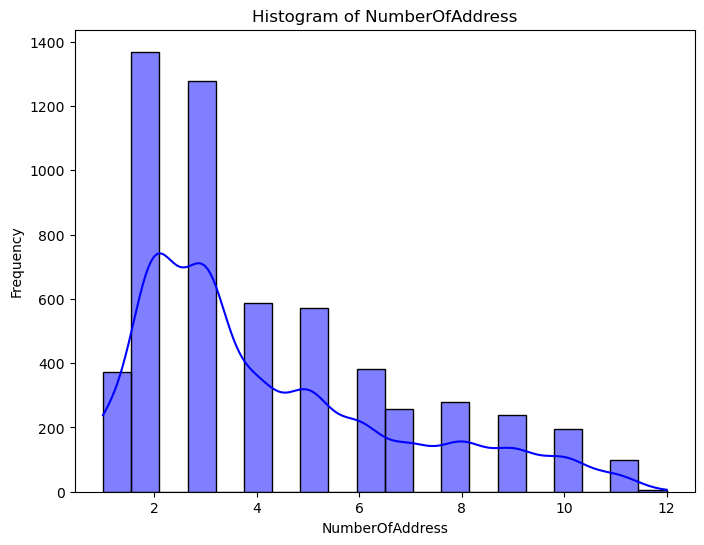

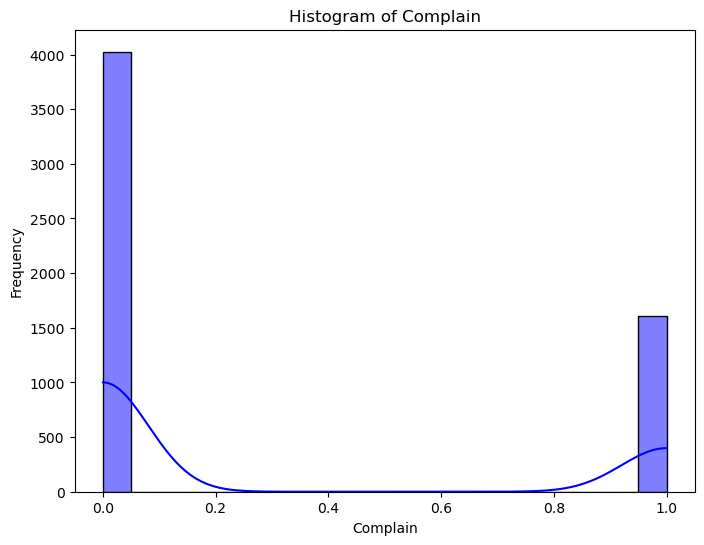

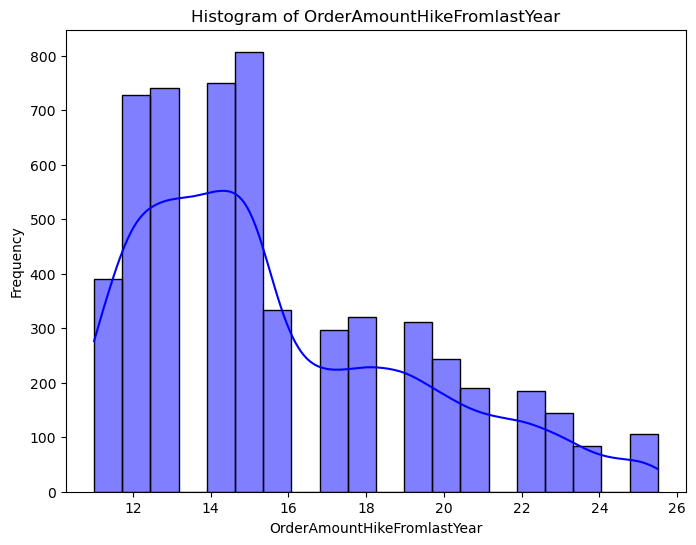

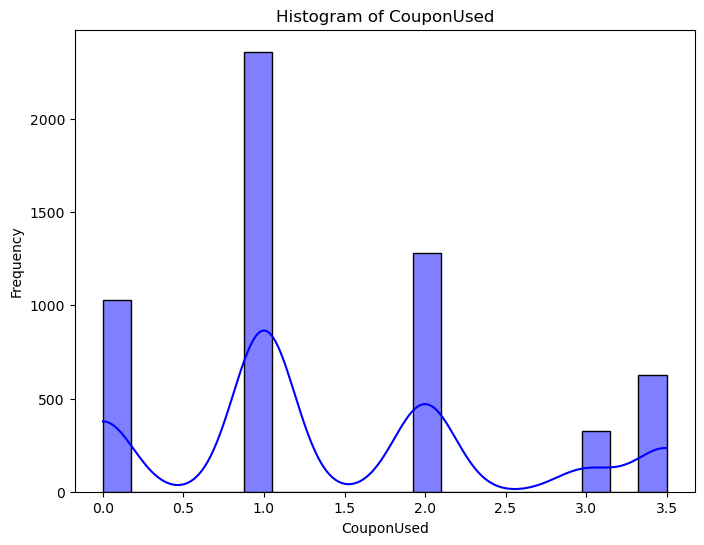

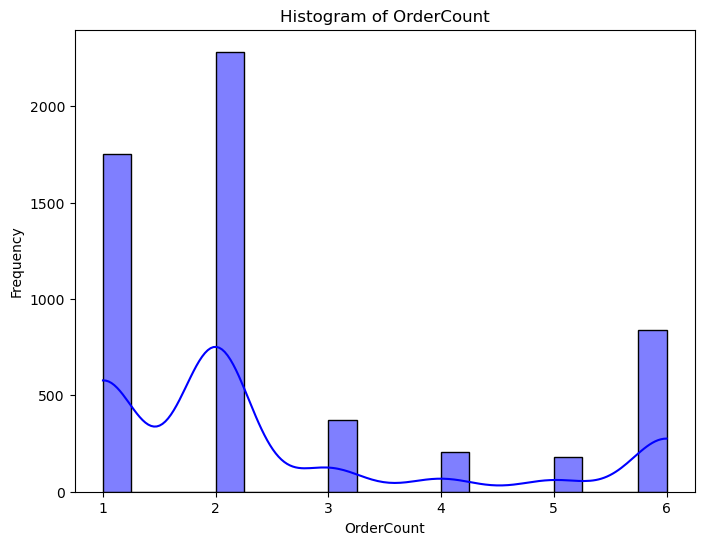

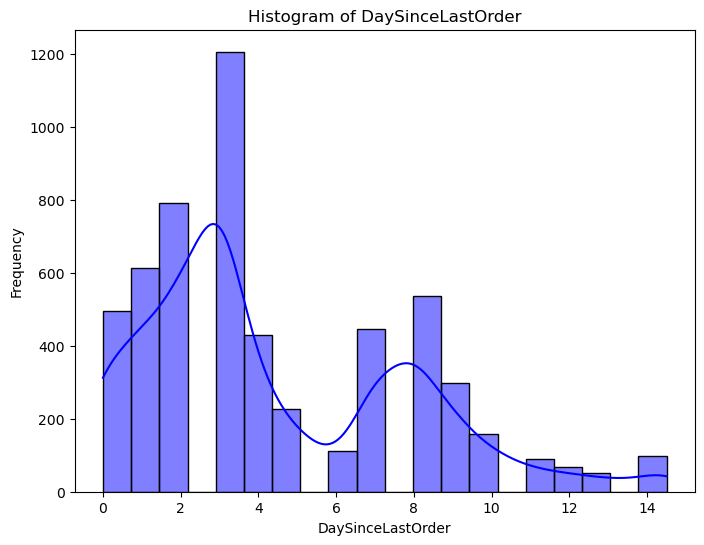

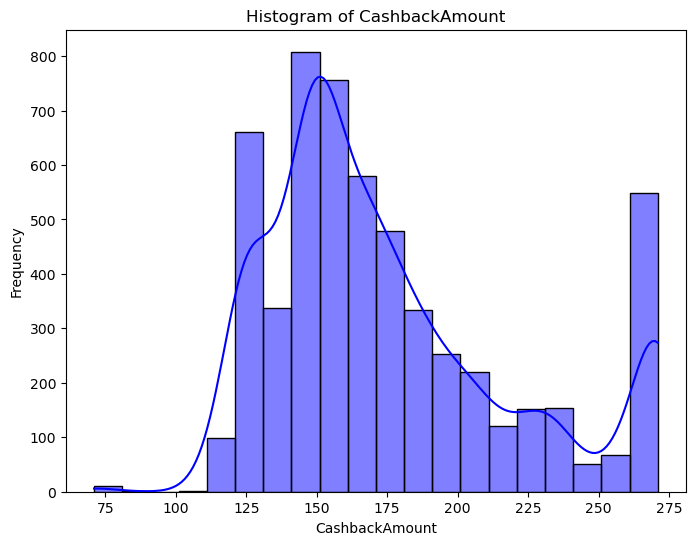

In [37]:
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.drop('Churn')

# Plot histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

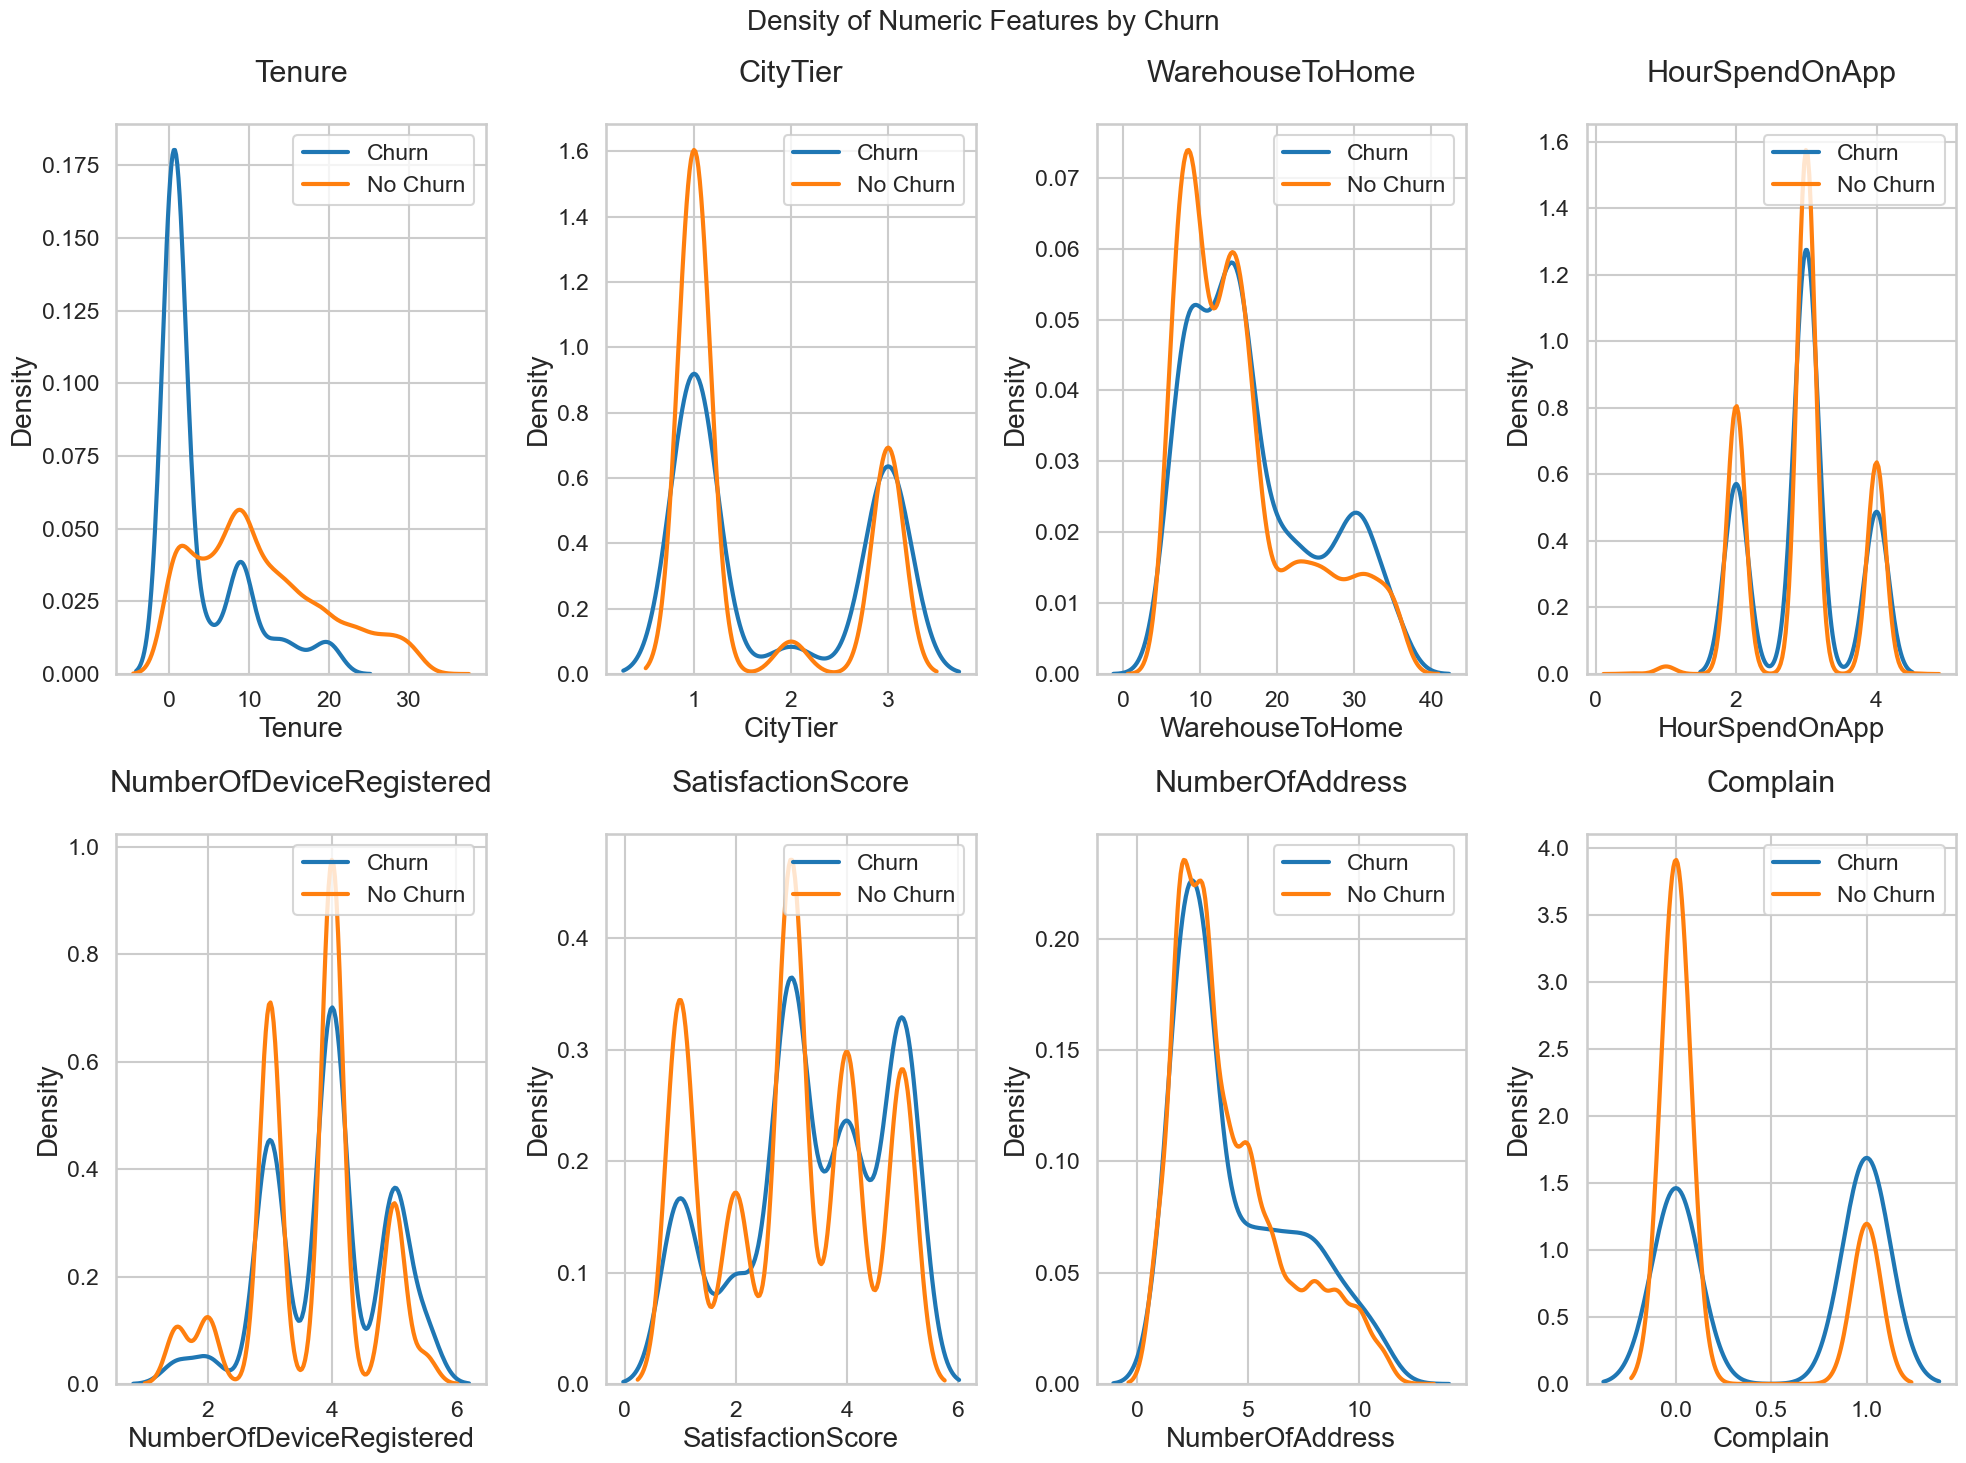

In [478]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

# Plot density plots for each numerical column by Churn
fig, ax = plt.subplots(2, min(4, len(numerical_cols)), figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx, col in enumerate(numerical_cols):
    try:
        sns.kdeplot(df[df['Churn'] == 1][col], linewidth=3, label='Churn', ax=ax[idx])
        sns.kdeplot(df[df['Churn'] == 0][col], linewidth=3, label='No Churn', ax=ax[idx])

        ax[idx].legend(loc='upper right')
        ax[idx].set_title(col)
    except IndexError:
        pass

plt.tight_layout()
plt.show()

- Tenure: Customers with longer tenure seem less likely to churn. Makes sense as longer tenure indicates satisfaction.
- Shorter warehouse to home distances have a lower churn rate. Faster deliveries may improve satisfaction.
- HourSpendOnApp: More time spent on app correlates with lower churn.
- NumberOfDeviceRegistered: More registered devices associates with lower churn.
- SatisfactionScore: Higher satisfaction scores strongly associate with lower churn.
- NumberOfAddress: Slight downward trend in churn as number of addresses increases. More addresses indicates loyalty.
- Complain: More complaints associate with higher churn, though relationship isn't very strong. Complaints hurt satisfaction.

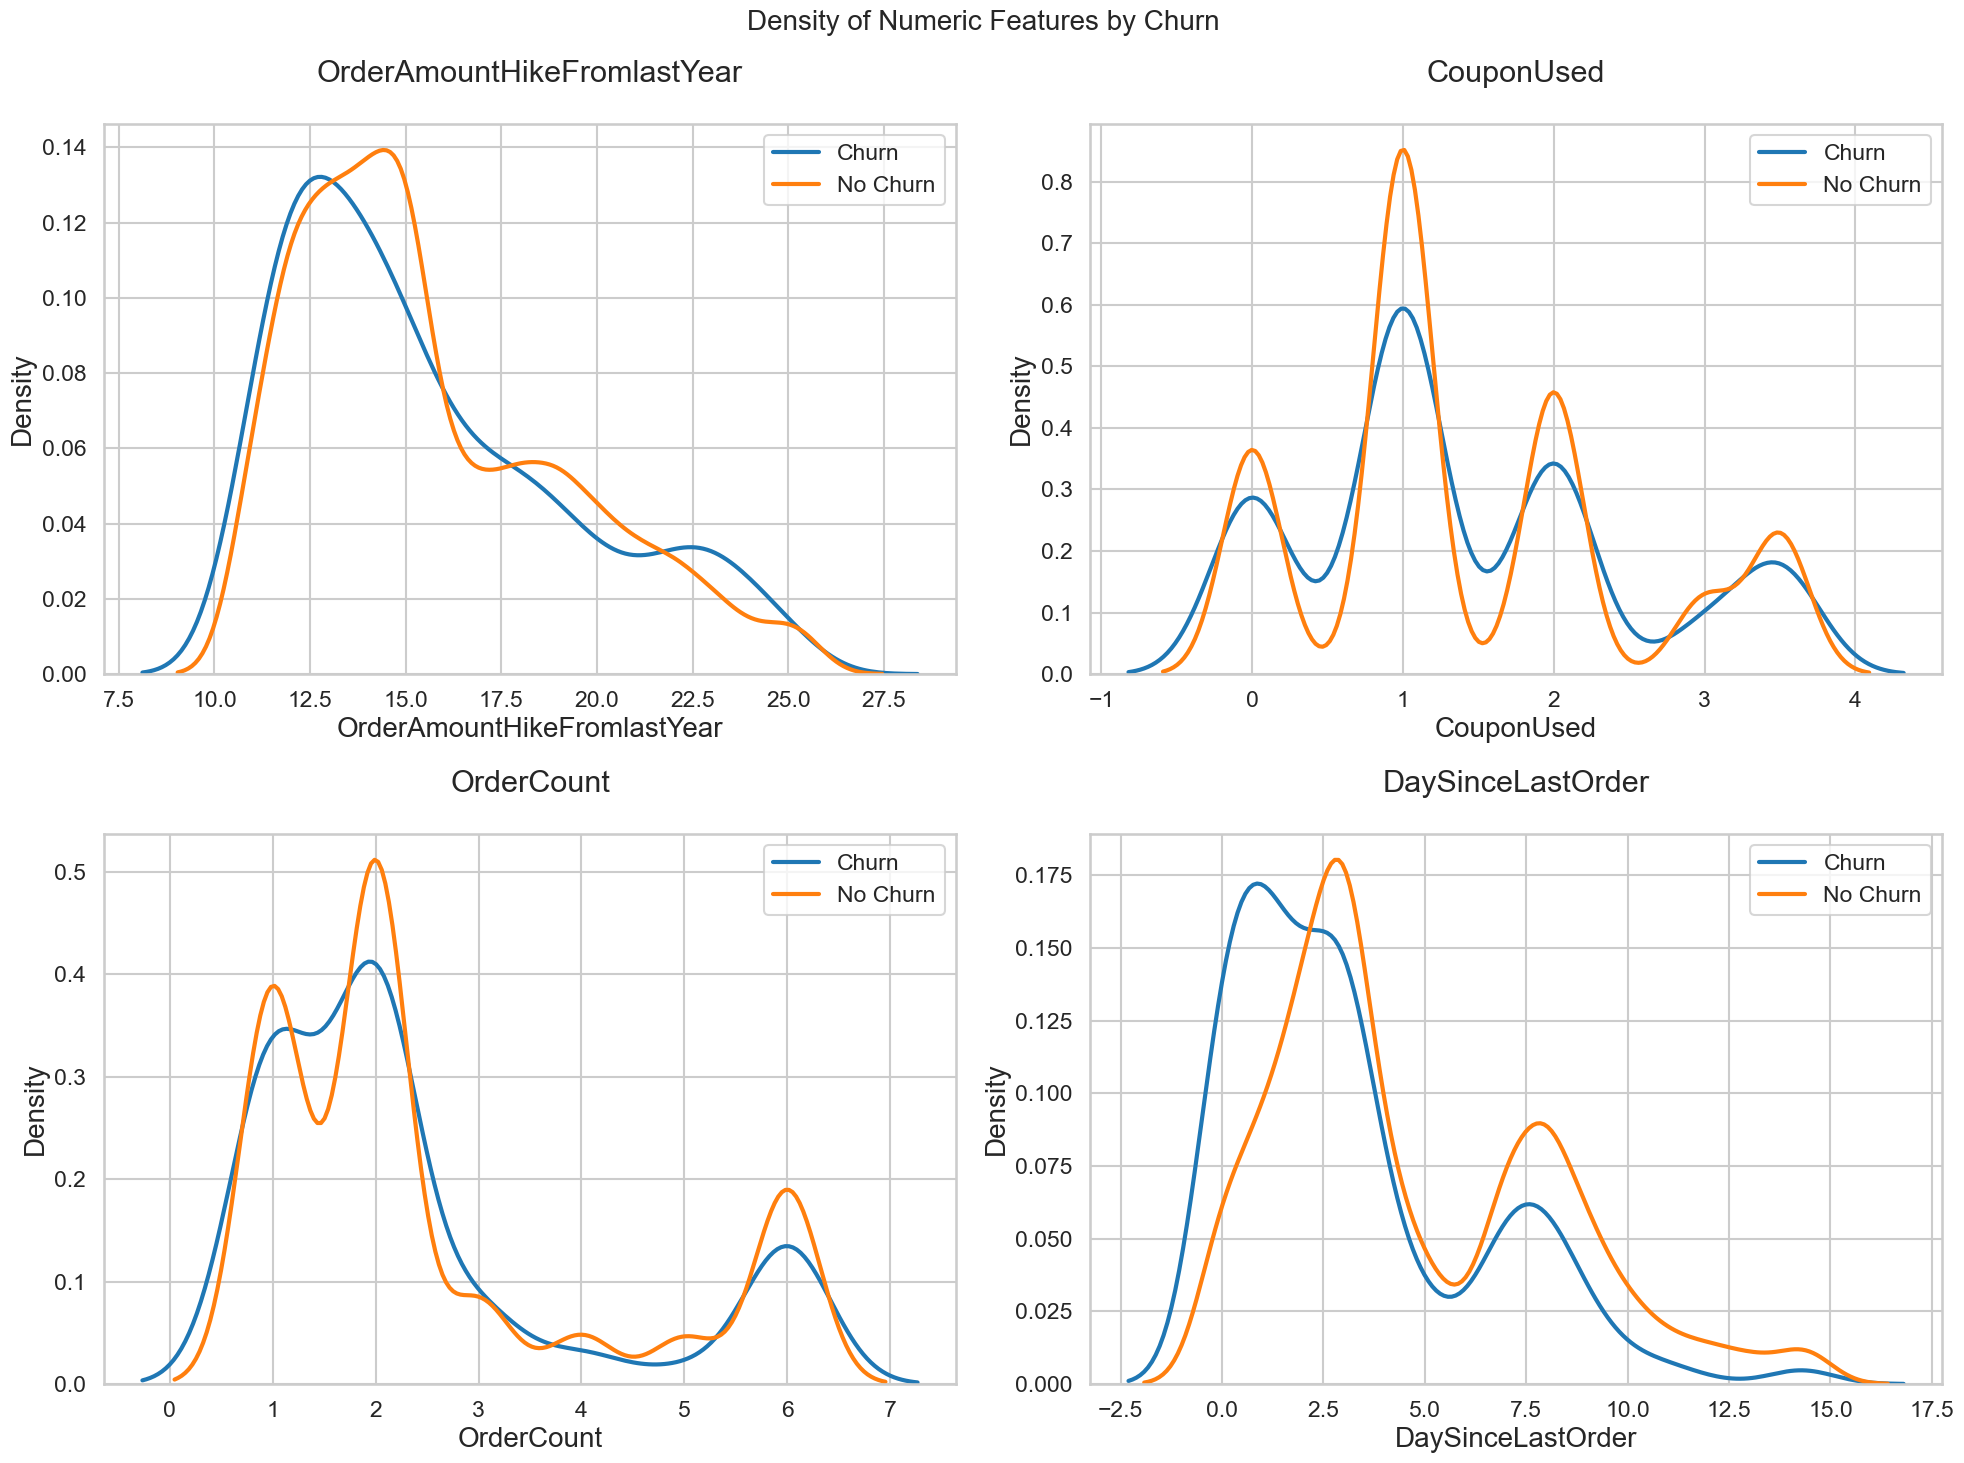

In [479]:
# Specify the numeric columns of interest
numeric_cols_of_interest = ['OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# Plot density plots for each numeric column of interest by Churn
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx, col in enumerate(numeric_cols_of_interest):
    sns.kdeplot(df[df['Churn'] == 1][col], linewidth=3, label='Churn', ax=ax[idx])
    sns.kdeplot(df[df['Churn'] == 0][col], linewidth=3, label='No Churn', ax=ax[idx])

    ax[idx].legend(loc='upper right')
    ax[idx].set_title(col)

plt.tight_layout()
plt.show()

- OrderAmountHikeFromLastYear: Big spenders from last year are less likely to churn.
- CouponUsed: Coupon usage correlates with lower churn. 
- OrderCount: Higher order counts associate with lower churn. Frequent usage builds habits.
- DaySinceLastOrder: Longer since last order correlates with higher churn. Recency is a good predictor.

## Bivariate Analysis

- Distribution of Categorical Features by Gender for Churned Customers

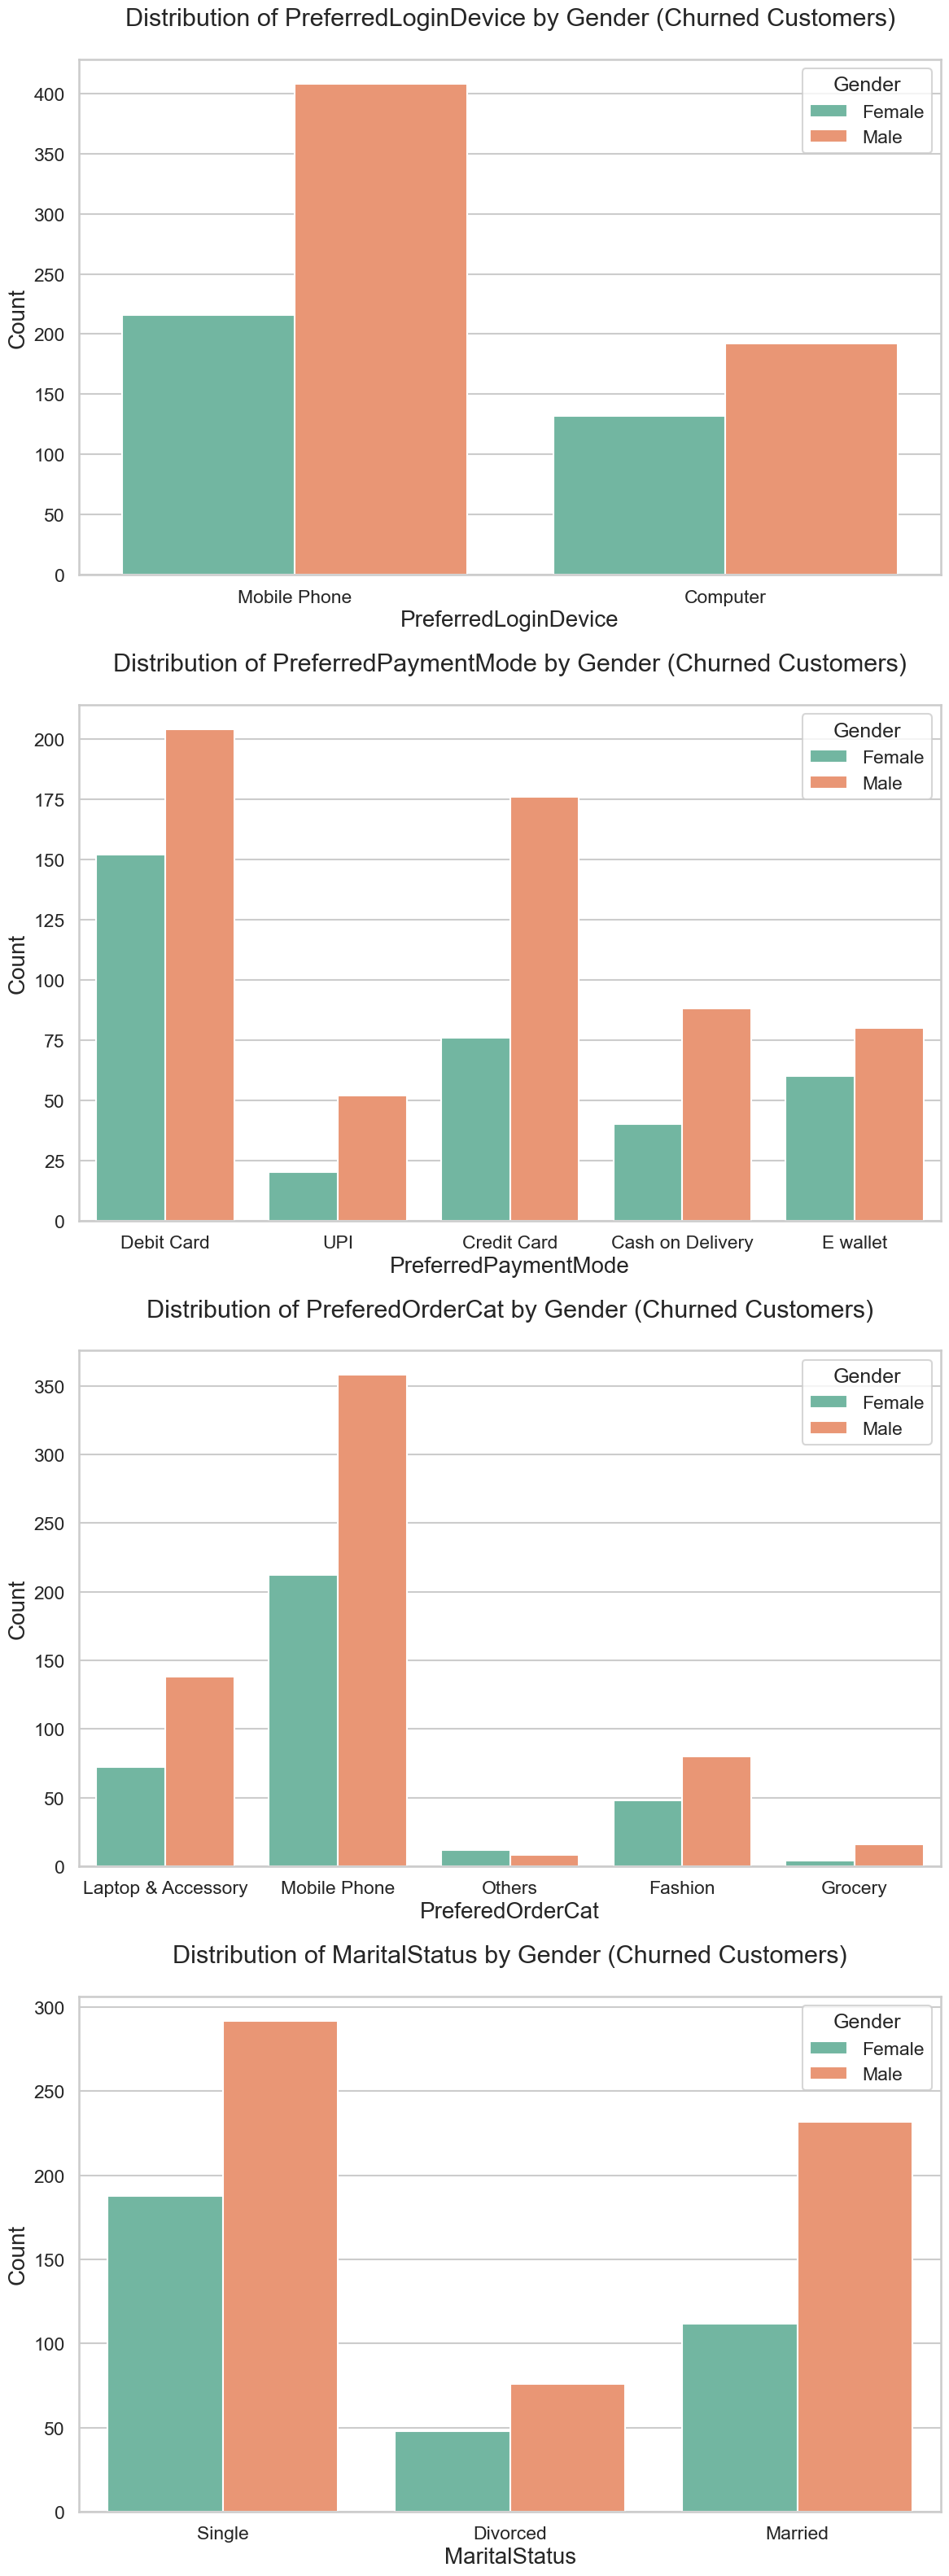

In [480]:
# Filter dataframe for churned customers
df_churned = df[df['Churn'] == 1]

# List of categorical columns
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']

# Set up the layout of subplots
fig, ax = plt.subplots(len(categorical_cols), 1, figsize=(12, 8 * len(categorical_cols)))

# Plot distribution for churned customers for each categorical column with respect to gender
for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df_churned, x=col, hue='Gender', hue_order=['Female', 'Male'], ax=ax[idx], palette='Set2')
    ax[idx].set_title(f'Distribution of {col} by Gender (Churned Customers)')
    ax[idx].set_xlabel(col)
    ax[idx].set_ylabel('Count')
    ax[idx].legend(title='Gender')

plt.tight_layout()
plt.show()

#### Analysing the Churn rate with respect to the Gender and their respective MaritalStatus

In [481]:
churn_by_gender_marital_status = pd.crosstab(
    [df['Gender'], df['MaritalStatus']], df['Churn']
)

print(churn_by_gender_marital_status)

Churn                    0    1
Gender MaritalStatus           
Female Divorced        300   48
       Married        1028  112
       Single          570  188
Male   Divorced        424   76
       Married        1614  232
       Single          746  292


In [482]:
# Function to calculate churn and non-churn rates for a specific group
def calculate_churn_nonchurn_rates(gender, marital_status):
    group = df[(df['Gender'] == gender) & (df['MaritalStatus'] == marital_status)]
    churn_rate = group['Churn'].mean()
    non_churn_rate = 1 - churn_rate
    return churn_rate, non_churn_rate

# Create a list of all combinations of Gender and MaritalStatus
combinations = [(gender, status) for gender in df['Gender'].unique() for status in df['MaritalStatus'].unique()]

# Calculate churn and non-churn rates for all combinations
churn_nonchurn_rates = []
for gender, status in combinations:
    churn_rate, non_churn_rate = calculate_churn_nonchurn_rates(gender, status)
    churn_nonchurn_rates.append({
        'Gender': gender,
        'MaritalStatus': status,
        'ChurnRate': churn_rate,
        'NonChurnRate': non_churn_rate
    })

# Creating a Dataframe for visual ease
churn_nonchurn_rate_df = pd.DataFrame(churn_nonchurn_rates)
print(churn_nonchurn_rate_df)

   Gender MaritalStatus  ChurnRate  NonChurnRate
0  Female        Single   0.248021      0.751979
1  Female      Divorced   0.137931      0.862069
2  Female       Married   0.098246      0.901754
3    Male        Single   0.281310      0.718690
4    Male      Divorced   0.152000      0.848000
5    Male       Married   0.125677      0.874323


#### Marital Status Impact:

- Single Customers: Both single male and female customers have the highest churn rates in their respective genders. Specifically, single males have a higher churn rate (28.13%) compared to single females (24.80%).
- Divorced Customers: Divorced customers have intermediate churn rates. Divorced males have a churn rate of 15.20%, while divorced females have a slightly lower churn rate of 13.79%.
- Married Customers: Married customers exhibit the lowest churn rates, indicating higher customer loyalty. Married males have a churn rate of 12.57%, while married females have an even lower churn rate of 9.82%.

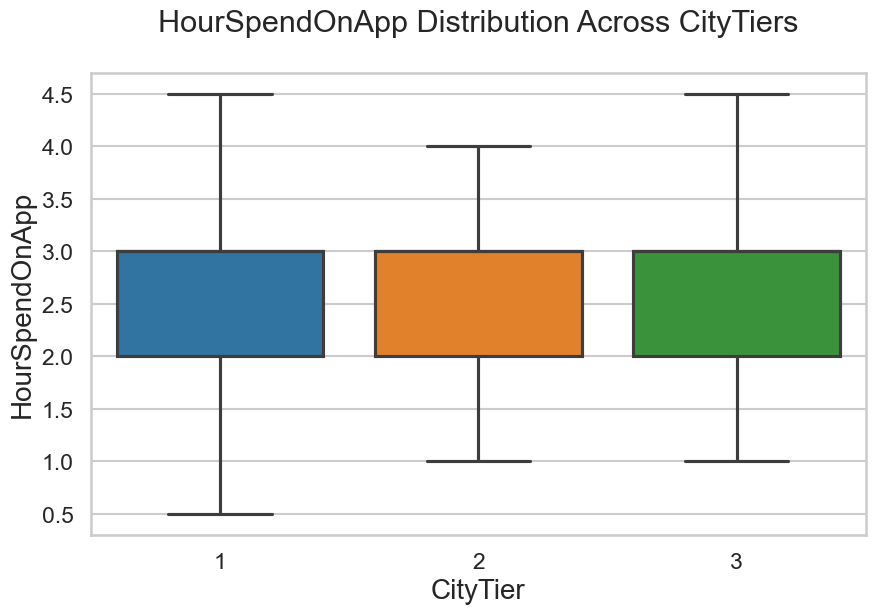

In [483]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='CityTier', y='HourSpendOnApp', data=df)

# Set the title and labels
plt.title('HourSpendOnApp Distribution Across CityTiers')
plt.xlabel('CityTier')
plt.ylabel('HourSpendOnApp')

# Show the plot
plt.show()


- Tier 1 cities have spent the most amount of hours on the App.

#### CityTier Vs Payment Method

In [41]:
import plotly.express as px

# Create the histogram
fig = px.histogram(df, x='PreferredPaymentMode', color='CityTier', facet_col='CityTier',
                   title='CityTier Vs PaymentMethod', 
                   labels={'PreferredPaymentMode': 'Preferred Payment Mode', 'count': 'Count'})

# Customize the plot
fig.update_layout(hovermode='x', title_font_size=30)
fig.update_layout(title_font_color="black", template="plotly", title_font_size=30, hoverlabel_font_size=20, title_x=0.5)
fig.update_xaxes(title='Preferred Payment Mode')
fig.update_yaxes(title='Count')

# Show the plot
fig.show()

## Multivariate Analysis

In [485]:
# check before encoding that my catogries for my columns are limited
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64
****************************************
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
****************************************
Gender
Male      3384
Female    2246
Name: count, dtype: int64
****************************************
PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64
****************************************
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64
****************************************


In [486]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1            Mobile Phone                  UPI    Male        Mobile Phone   
2            Mobile Phone           Debit Card    Male        Mobile Phone   
3            Mobile Phone           Debit Card    Male  Laptop & Accessory   
4            Mobile Phone          Credit Card    Male        Mobile Phone   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

# Encoding and Scaling of Data

In [562]:
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [565]:
le = LabelEncoder()
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     9.0                     1         1              8.0   
2      1     9.0                     1         1             30.0   
3      1     0.0                     1         3             15.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0             3.0                       3.0   
1                     4       1             3.0                       4.0   
2                     2       1             2.0                       4.0   
3                     2       1             2.0                       4.0   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2              2              9.0   
1                 3                  3              2              7.0   
2                 3                  3              2              6.0   
3                 2                  5              2              8.0   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   

   DaySinceLastOrder  CashbackAmount  HoursSpentOnApp_OrderCount_Ratio  
0                5.0           160.0                               3.0  
1                0.0           121.0                               3.0  
2                3.0           120.0                               2.0  
3                3.0           134.0                               2.0

In [566]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

PreferredLoginDevice  PreferredPaymentMode  Gender  PreferedOrderCat  \
0                     1                     2       0                 2   
1                     1                     4       1                 3   
2                     1                     2       1                 3   
3                     1                     2       1                 2   

   MaritalStatus  
0              2  
1              2  
2              2  
3              2

In [569]:
corr_matrix = df.corr()
corr_matrix

Churn    Tenure  PreferredLoginDevice  \
Churn                             1.000000 -0.339678             -0.051099   
Tenure                           -0.339678  1.000000              0.039698   
PreferredLoginDevice             -0.051099  0.039698              1.000000   
CityTier                          0.084703 -0.059555              0.002476   
WarehouseToHome                   0.073529 -0.020914             -0.017617   
PreferredPaymentMode              0.002345 -0.009657              0.006681   
Gender                            0.029264 -0.045926             -0.015871   
HourSpendOnApp                    0.018861 -0.019195              0.019015   
NumberOfDeviceRegistered          0.105669 -0.018833             -0.019154   
PreferedOrderCat                  0.104569 -0.189027              0.005152   
SatisfactionScore                 0.105481 -0.012767              0.036049   
MaritalStatus                     0.140316 -0.104011             -0.028785   
NumberOfAddress                   0.042697  0.240094              0.029848   
Complain                          0.250188 -0.022093              0.001327   
OrderAmountHikeFromlastYear      -0.006856 -0.006965             -0.012671   
CouponUsed                       -0.008644  0.080694             -0.010183   
OrderCount                       -0.029832  0.138438             -0.013114   
DaySinceLastOrder                -0.162501  0.181369             -0.003050   
CashbackAmount                   -0.160295  0.467403              0.043488   
HoursSpentOnApp_OrderCount_Ratio  0.045173 -0.160335              0.030740   

                                  CityTier  WarehouseToHome  \
Churn                             0.084703         0.073529   
Tenure                           -0.059555        -0.020914   
PreferredLoginDevice              0.002476        -0.017617   
CityTier                          1.000000         0.008197   
WarehouseToHome                   0.008197         1.000000   
PreferredPaymentMode              0.246170         0.007989   
Gender                           -0.025176        -0.004521   
HourSpendOnApp                   -0.010221         0.068421   
NumberOfDeviceRegistered          0.026060         0.023405   
PreferedOrderCat                 -0.170513        -0.086017   
SatisfactionScore                -0.011554         0.013683   
MaritalStatus                     0.006818        -0.013686   
NumberOfAddress                  -0.028077        -0.006917   
Complain                          0.003375         0.030171   
OrderAmountHikeFromlastYear      -0.028805         0.039745   
CouponUsed                        0.025752         0.015066   
OrderCount                        0.041517         0.006686   
DaySinceLastOrder                 0.010283         0.025516   
CashbackAmount                    0.072527         0.015342   
HoursSpentOnApp_OrderCount_Ratio -0.031390        -0.008263   

                                  PreferredPaymentMode    Gender  \
Churn                                         0.002345  0.029264   
Tenure                                       -0.009657 -0.045926   
PreferredLoginDevice                          0.006681 -0.015871   
CityTier                                      0.246170 -0.025176   
WarehouseToHome                               0.007989 -0.004521   
PreferredPaymentMode                          1.000000  0.016999   
Gender                                        0.016999  1.000000   
HourSpendOnApp                               -0.003838 -0.017683   
NumberOfDeviceRegistered                      0.016173 -0.022710   
PreferedOrderCat                             -0.032268  0.062003   
SatisfactionScore                            -0.014640 -0.035220   
MaritalStatus                                -0.021391 -0.017370   
NumberOfAddress                              -0.003099 -0.033768   
Complain                                      0.023890 -0.040269   
OrderAmountHikeFromlastYear                  -0.001152

In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Churn                             5630 non-null   int64  
 1   Tenure                            5630 non-null   float64
 2   PreferredLoginDevice              5630 non-null   int32  
 3   CityTier                          5630 non-null   int64  
 4   WarehouseToHome                   5630 non-null   float64
 5   PreferredPaymentMode              5630 non-null   int32  
 6   Gender                            5630 non-null   int32  
 7   HourSpendOnApp                    5630 non-null   float64
 8   NumberOfDeviceRegistered          5630 non-null   float64
 9   PreferedOrderCat                  5630 non-null   int32  
 10  SatisfactionScore                 5630 non-null   int64  
 11  MaritalStatus                     5630 non-null   int32  
 12  Number

### Scaling

In [571]:
from sklearn.preprocessing import StandardScaler

# List of numerical features excluding 'Churn'
num = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 
       'HoursSpentOnApp_OrderCount_Ratio']

# Initialize the scaler
scaler = StandardScaler()

# Extract the numerical features from the dataframe
features = df[num]
features = scaler.fit_transform(features)

# Fit and transform the features
scaled_df_encoded = df.copy()
scaled_df_encoded[num] = features
scaled_df_encoded

Churn    Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1 -0.737959                     1         3        -1.178795   
1         1 -0.134866                     1         1        -0.931534   
2         1 -0.134866                     1         1         1.788340   
3         1 -1.220433                     1         3        -0.066119   
4         1 -1.220433                     1         1        -0.437011   
...     ...       ...                   ...       ...              ...   
5625      0 -0.014247                     0         1         1.788340   
5626      0  0.347609                     1         1        -0.313381   
5627      0 -1.099814                     1         1        -0.560642   
5628      0  1.553794                     0         3        -0.807903   
5629      0 -0.255484                     1         1        -0.066119   

      PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                        2       0        0.092878                 -0.738345   
1                        4       1        0.092878                  0.323303   
2                        2       1       -1.328053                  0.323303   
3                        2       1       -1.328053                  0.323303   
4                        1       1        0.092878                 -0.738345   
...                    ...     ...             ...                       ...   
5625                     1       1        0.092878                 -1.799993   
5626                     1       1        0.092878                  1.384951   
5627                     2       1        0.092878                 -1.799993   
5628                     1       1        1.513809                  1.384951   
5629                     1       1        0.092878                 -1.799993   

      PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                    2          -0.772992              2         1.875626   
1                    3          -0.048392              2         1.092812   
2                    3          -0.048392              2         0.701405   
3                    2           1.400807              2         1.484219   
4                    3           1.400807              2        -0.472817   
...                ...                ...            ...              ...   
5625                 2          -1.497592              1         0.701405   
5626                 0           1.400807              1         0.701405   
5627                 2           0.676207              1        -0.472817   
5628                 2           0.676207              1        -0.081410   
5629                 2          -0.048392              1        -0.081410   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0     1.584290                    -1.304023   -0.411136   -0.888745   
1     1.584290                    -0.187486   -1.344668   -0.888745   
2     1.584290                    -0.466620   -1.344668   -0.888745   
3    -0.631198                     2.045589   -1.344668   -0.888745   
4    -0.631198                    -1.304023   -0.411136   -0.888745   
...        ...                          ...         ...         ...   
5625 -0.631198                     0.649917   -0.411136   -0.304276   
5626 -0.631198                     0.091648   -0.411136   -0.304276   
5627  1.584290                     1.487320   -0.411136   -0.304276   
5628 -0.631198                    -0.187486    0.522397   -0.304276   
5629 -0.631198                    -0.745755    0.522397   -0.304276   

      DaySinceLastOrder  CashbackAmount  HoursSpentOnApp_OrderCount_Ratio  
0              0.166005       -0.347374                          1.722376  
1             -1.287958       -1.237164                          1.722376  
2             -0.415580       -1.259980                          0.476514  
3             -0.415580       -0.940568                          0.476514 

In [572]:
scaled_df_encoded

Churn    Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1 -0.737959                     1         3        -1.178795   
1         1 -0.134866                     1         1        -0.931534   
2         1 -0.134866                     1         1         1.788340   
3         1 -1.220433                     1         3        -0.066119   
4         1 -1.220433                     1         1        -0.437011   
...     ...       ...                   ...       ...              ...   
5625      0 -0.014247                     0         1         1.788340   
5626      0  0.347609                     1         1        -0.313381   
5627      0 -1.099814                     1         1        -0.560642   
5628      0  1.553794                     0         3        -0.807903   
5629      0 -0.255484                     1         1        -0.066119   

      PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                        2       0        0.092878                 -0.738345   
1                        4       1        0.092878                  0.323303   
2                        2       1       -1.328053                  0.323303   
3                        2       1       -1.328053                  0.323303   
4                        1       1        0.092878                 -0.738345   
...                    ...     ...             ...                       ...   
5625                     1       1        0.092878                 -1.799993   
5626                     1       1        0.092878                  1.384951   
5627                     2       1        0.092878                 -1.799993   
5628                     1       1        1.513809                  1.384951   
5629                     1       1        0.092878                 -1.799993   

      PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                    2          -0.772992              2         1.875626   
1                    3          -0.048392              2         1.092812   
2                    3          -0.048392              2         0.701405   
3                    2           1.400807              2         1.484219   
4                    3           1.400807              2        -0.472817   
...                ...                ...            ...              ...   
5625                 2          -1.497592              1         0.701405   
5626                 0           1.400807              1         0.701405   
5627                 2           0.676207              1        -0.472817   
5628                 2           0.676207              1        -0.081410   
5629                 2          -0.048392              1        -0.081410   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0     1.584290                    -1.304023   -0.411136   -0.888745   
1     1.584290                    -0.187486   -1.344668   -0.888745   
2     1.584290                    -0.466620   -1.344668   -0.888745   
3    -0.631198                     2.045589   -1.344668   -0.888745   
4    -0.631198                    -1.304023   -0.411136   -0.888745   
...        ...                          ...         ...         ...   
5625 -0.631198                     0.649917   -0.411136   -0.304276   
5626 -0.631198                     0.091648   -0.411136   -0.304276   
5627  1.584290                     1.487320   -0.411136   -0.304276   
5628 -0.631198                    -0.187486    0.522397   -0.304276   
5629 -0.631198                    -0.745755    0.522397   -0.304276   

      DaySinceLastOrder  CashbackAmount  HoursSpentOnApp_OrderCount_Ratio  
0              0.166005       -0.347374                          1.722376  
1             -1.287958       -1.237164                          1.722376  
2             -0.415580       -1.259980                          0.476514  
3             -0.415580       -0.940568                          0.476514 

## Multivariate Analysis

<Axes: >

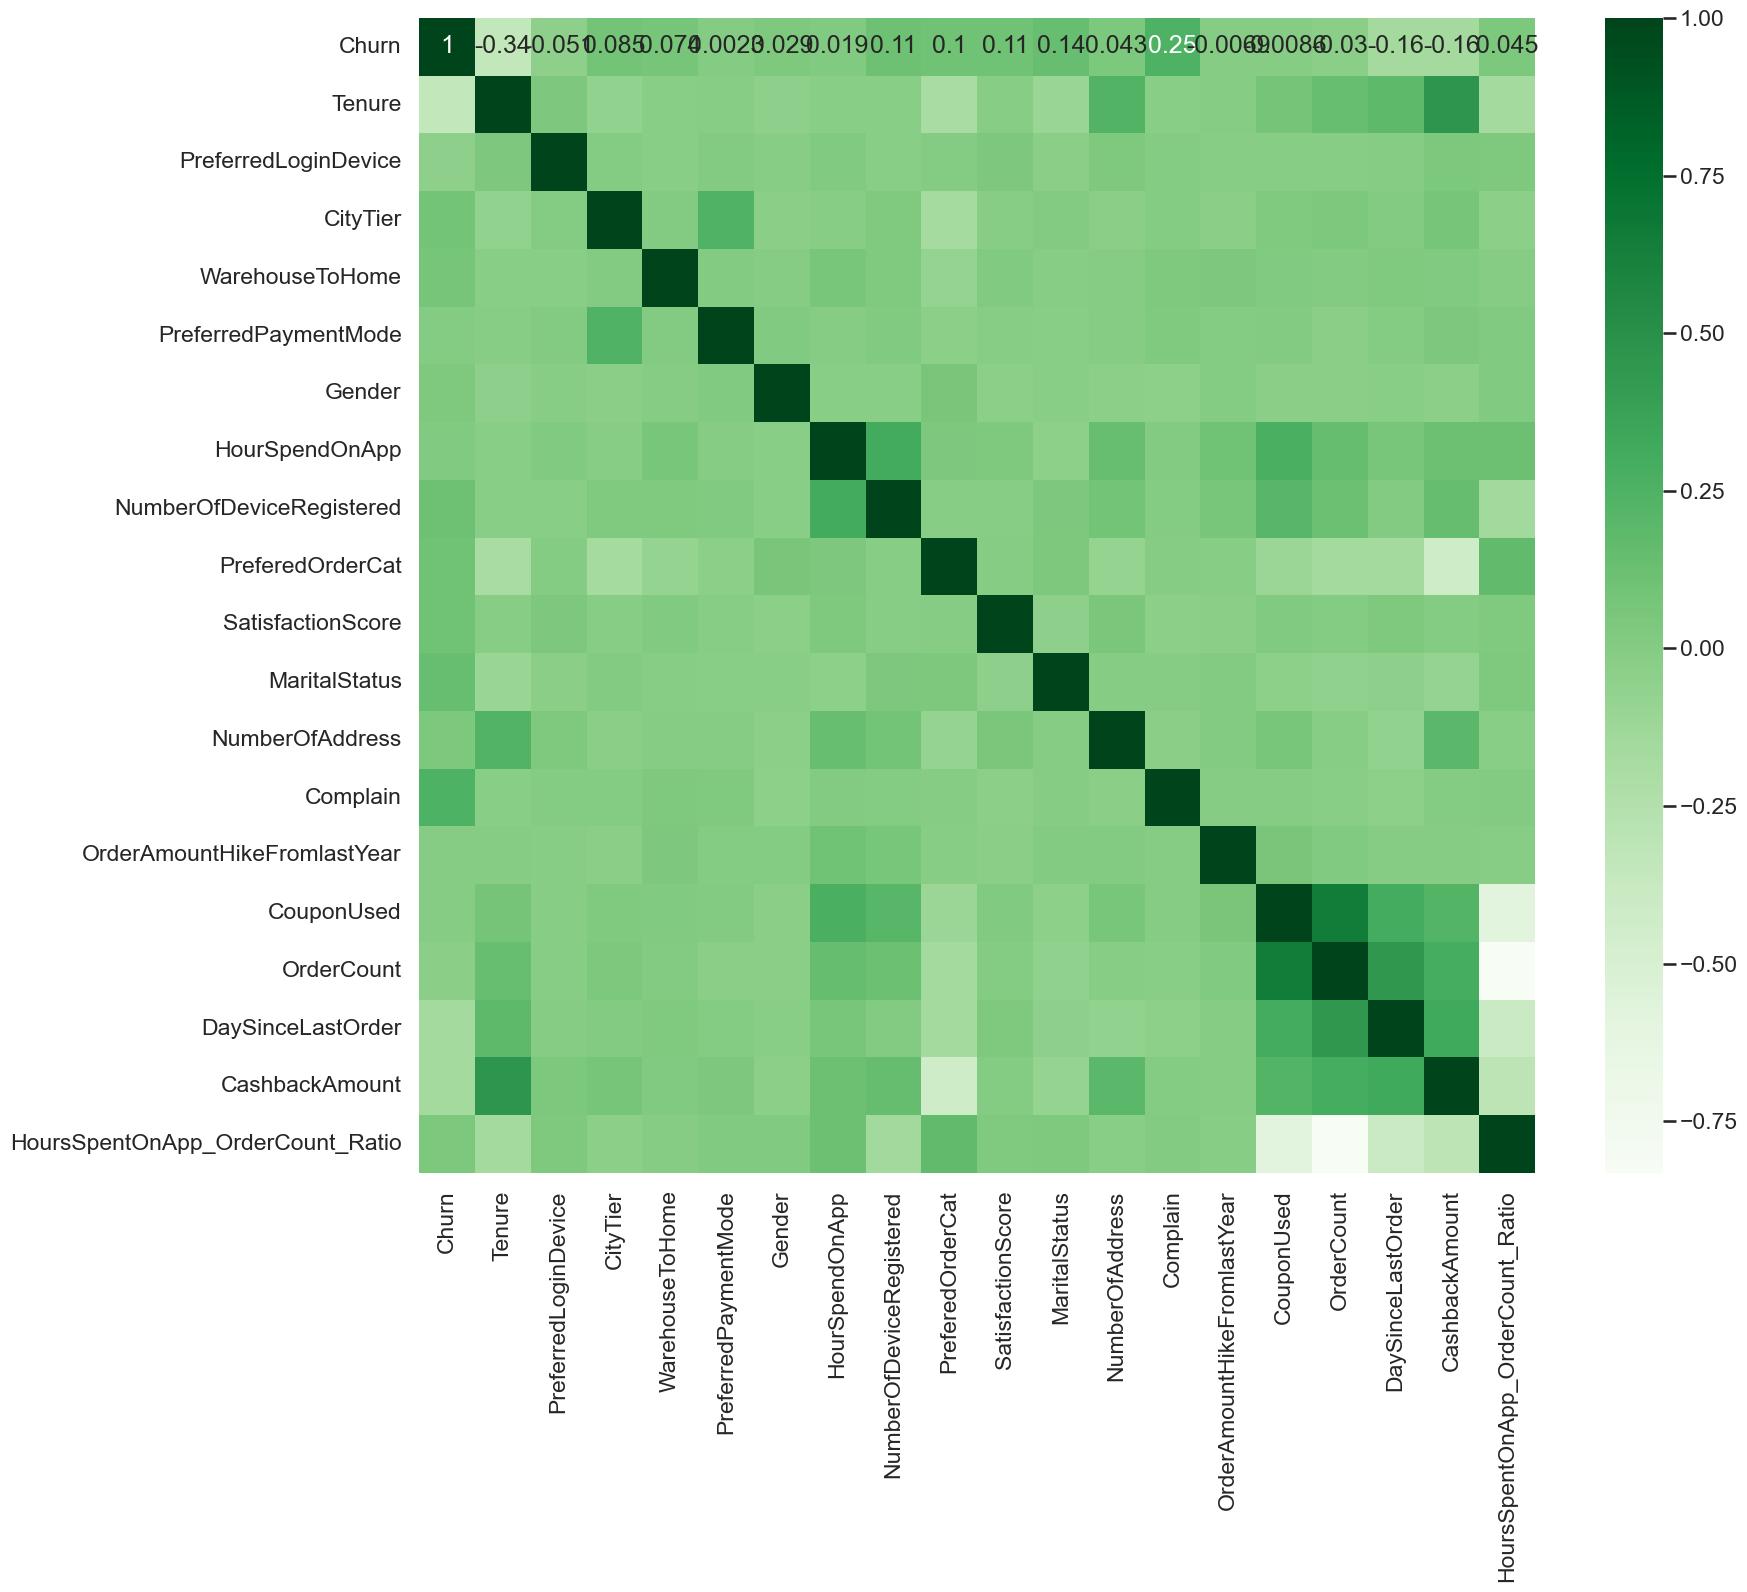

In [537]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Greens')

<Axes: >

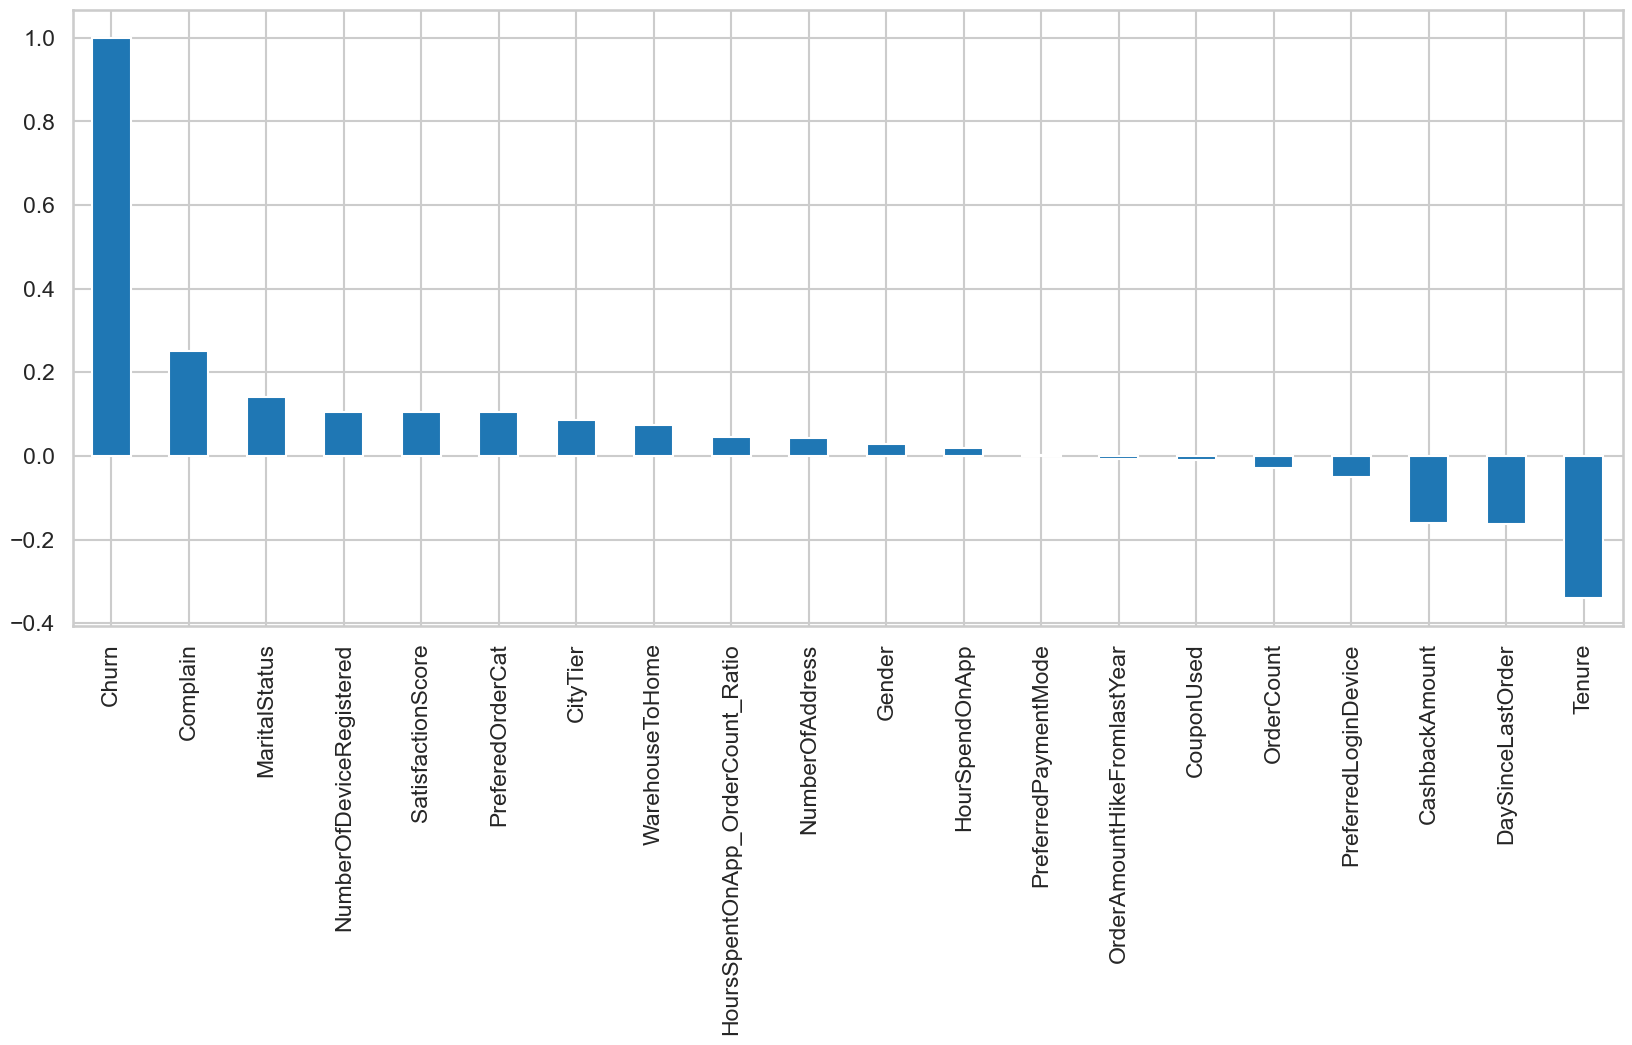

In [538]:
plt.figure(figsize=(20,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

- **HIGH Churn** seen in case of Complain, Marital Status, Number of Device Registered and Satisfaction Score. 

- **LOW Churn** is seens in case of Tenure, DaySinceLastOrder, CashBackAmount and PreferedLoginDevice.

- Factors like Gender, NumberOfAddress, HoursSpentOnApp have almost **NO** impact

## K-MEANS Clustering for Customer Segmentation

In [575]:
# Make a copy of scaled_df_encoded
scaled_df_encoded_k = scaled_df_encoded.copy()

# Drop the 'Churn' column
scaled_df_encoded_k.drop(columns=['Churn'], inplace=True)

# Display the first few rows of the new DataFrame
scaled_df_encoded_k.head()

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0 -0.737959                     1         3        -1.178795   
1 -0.134866                     1         1        -0.931534   
2 -0.134866                     1         1         1.788340   
3 -1.220433                     1         3        -0.066119   
4 -1.220433                     1         1        -0.437011   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0        0.092878                 -0.738345   
1                     4       1        0.092878                  0.323303   
2                     2       1       -1.328053                  0.323303   
3                     2       1       -1.328053                  0.323303   
4                     1       1        0.092878                 -0.738345   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2          -0.772992              2         1.875626   
1                 3          -0.048392              2         1.092812   
2                 3          -0.048392              2         0.701405   
3                 2           1.400807              2         1.484219   
4                 3           1.400807              2        -0.472817   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0  1.584290                    -1.304023   -0.411136   -0.888745   
1  1.584290                    -0.187486   -1.344668   -0.888745   
2  1.584290                    -0.466620   -1.344668   -0.888745   
3 -0.631198                     2.045589   -1.344668   -0.888745   
4 -0.631198                    -1.304023   -0.411136   -0.888745   

   DaySinceLastOrder  CashbackAmount  HoursSpentOnApp_OrderCount_Ratio  
0           0.166005       -0.347374                          1.722376  
1          -1.287958       -1.237164                          1.722376  
2          -0.415580       -1.259980                          0.476514  
3          -0.415580       -0.940568                          0.476514  
4          -0.415580       -1.031828                          1.722376

In [576]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df_encoded_k)

KMeans(n_clusters=2)

In [577]:
k_means.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [578]:
k_means.inertia_

83087.69189914367

In [580]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

77797.50986063568

In [582]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

73423.55319239998

In [583]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df_encoded_k)
k_means.inertia_

71198.16975395833

In [584]:
wss =[] 
for i in range(1,20):
    k_means = KMeans(n_clusters=i)
    k_means.fit(scaled_df_encoded_k)
    wss.append(k_means.inertia_)

In [585]:
wss

[95469.40177619891,
 83087.7227298608,
 77797.45800075002,
 73423.36861356221,
 71198.98144685825,
 69238.91468769399,
 67826.40947692687,
 66263.85603814815,
 64886.68084292426,
 63606.846098022615,
 62584.5440895594,
 61605.0429835411,
 60820.87439948698,
 59849.89506144155,
 59547.59242316453,
 58693.85380462446,
 58166.667871431,
 57383.940904805466,
 56768.55686754551]

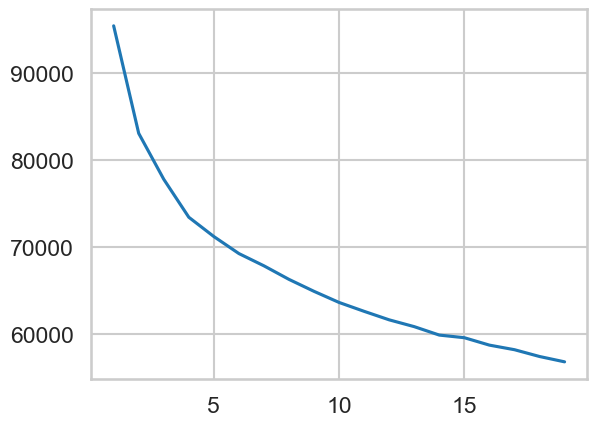

In [586]:
plt.plot(range(1,20), wss)

In [587]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [588]:
# Silhoutte score for 2 cluster
Sil_Score = []
for i in range(2,20):
  k_means = KMeans(n_clusters=i)
  k_means.fit(scaled_df_encoded_k)
  labels = k_means.labels_
  ss = silhouette_score(scaled_df_encoded_k,labels)
  Sil_Score.append(ss)

In [589]:
Sil_Score

[0.1446295437929002,
 0.11133275291348146,
 0.08852406379326747,
 0.07991232493413895,
 0.0838926082740045,
 0.07890329019253352,
 0.0805211282767952,
 0.0728911093464879,
 0.06976709746104126,
 0.06935900010452072,
 0.07385780334653937,
 0.06744604781473656,
 0.06577678663431641,
 0.06946020285612424,
 0.06931020625891754,
 0.06783760811379665,
 0.07177466666909635,
 0.07293815943944017]

In [590]:
# taking ideal number of clusters as 4
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df_encoded_k)
labels = k_means.labels_

In [591]:
scaled_df_encoded_k["Clus_kmeans"] = labels
scaled_df_encoded_k.head(10)

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0 -0.737959                     1         3        -1.178795   
1 -0.134866                     1         1        -0.931534   
2 -0.134866                     1         1         1.788340   
3 -1.220433                     1         3        -0.066119   
4 -1.220433                     1         1        -0.437011   
5 -1.220433                     0         1         0.799295   
6 -0.134866                     1         3        -0.560642   
7 -0.134866                     1         1        -1.178795   
8  0.347609                     1         3        -0.807903   
9 -0.134866                     1         1         1.911971   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     2       0        0.092878                 -0.738345   
1                     4       1        0.092878                  0.323303   
2                     2       1       -1.328053                  0.323303   
3                     2       1       -1.328053                  0.323303   
4                     1       1        0.092878                 -0.738345   
5                     2       0        0.092878                  1.384951   
6                     0       1       -1.328053                 -0.738345   
7                     1       1        0.092878                 -0.738345   
8                     3       1        0.092878                  0.323303   
9                     2       1       -1.328053                  1.384951   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2          -0.772992              2         1.875626   
1                 3          -0.048392              2         1.092812   
2                 3          -0.048392              2         0.701405   
3                 2           1.400807              2         1.484219   
4                 3           1.400807              2        -0.472817   
5                 3           1.400807              2        -0.864224   
6                 2          -0.772992              0        -0.081410   
7                 3          -0.772992              0        -0.472817   
8                 3          -0.048392              0        -0.864224   
9                 3          -0.048392              2        -0.864224   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0  1.584290                    -1.304023   -0.411136   -0.888745   
1  1.584290                    -0.187486   -1.344668   -0.888745   
2  1.584290                    -0.466620   -1.344668   -0.888745   
3 -0.631198                     2.045589   -1.344668   -0.888745   
4 -0.631198                    -1.304023   -0.411136   -0.888745   
5  1.584290                     1.766454    1.922695    2.033597   
6 -0.631198                    -0.466620   -1.344668   -0.888745   
7  1.584290                     0.091648    0.522397   -0.304276   
8  1.584290                    -0.466620   -1.344668   -0.888745   
9 -0.631198                    -1.024889   -0.411136   -0.888745   

   DaySinceLastOrder  CashbackAmount  HoursSpentOnApp_OrderCount_Ratio  \
0           0.166005       -0.347374                          1.722376   
1          -1.287958       -1.237164                          1.722376   
2          -0.415580       -1.259980                          0.476514   
3          -0.415580       -0.940568                          0.476514   
4          -0.415580       -1.031828                          1.722376   
5           0.747590       -0.826492                         -1.392278   
6          -1.287958       -1.237164                          0.476514   
7          -1.287958       -1.191534                         -0.146416   
8          -0.706373       -1.100274                          1.722376   
9          -0.997165       -1.191534                          0.476514   

   Clus_kmeans  
0            1  
1            1  
2            1  
3    

In [592]:
aggdata_k = scaled_df_encoded_k.iloc[:,:].groupby('Clus_kmeans').mean()
aggdata_k['freq'] = scaled_df_encoded_k.Clus_kmeans.value_counts().sort_index()
aggdata_k

Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
Clus_kmeans                                                              
0            0.749448              0.752486  1.692818         0.159968   
1           -0.259602              0.702854  1.611080        -0.101645   
2           -0.266070              0.700391  1.617663         0.038680   
3            0.227725              0.701480  1.750218        -0.028137   

             PreferredPaymentMode    Gender  HourSpendOnApp  \
Clus_kmeans                                                   
0                        1.763536  0.567956       -0.068841   
1                        1.750420  0.616116       -0.594528   
2                        1.773617  0.616546        0.626224   
3                        1.743255  0.579634        0.003838   

             NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
Clus_kmeans                                                                  
0                            0.004222          0.438674          -0.002755   
1                           -0.606456          2.569670           0.003104   
2                            0.596875          2.621017          -0.007889   
3                            0.010537          1.852045           0.009626   

             MaritalStatus  NumberOfAddress  Complain  \
Clus_kmeans                                             
0                 1.125967         0.294860  0.049361   
1                 1.196419        -0.256196 -0.000149   
2                 1.209614         0.222264  0.018960   
3                 1.093995        -0.179858 -0.068167   

             OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
Clus_kmeans                                                        
0                              -0.004275   -0.137265   -0.272631   
1                              -0.137970   -0.797713   -0.786700   
2                               0.158194    0.140426   -0.192871   
3                              -0.028362    1.130127    1.738565   

             DaySinceLastOrder  CashbackAmount  \
Clus_kmeans                                      
0                     0.204884        1.170451   
1                    -0.461306       -0.695231   
2                    -0.261732       -0.163922   
3                     0.963596        0.414600   

             HoursSpentOnApp_OrderCount_Ratio  freq  
Clus_kmeans                                          
0                                    0.018551   905  
1                                    0.857128  1787  
2                                   -0.013926  1789  
3                                   -1.325991  1149

In [594]:
features_considered = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'NumberOfDeviceRegistered',
    'SatisfactionScore',
    'NumberOfAddress',
    'Complain',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount'
]

# Select the columns and create a new DataFrame
df_k = df[features_considered].copy()

# Add the 'Clus_kmeans' column from the scaled DataFrame
df_k['Clus_kmeans'] = scaled_df_encoded_k["Clus_kmeans"]

# Display the first few rows of the new DataFrame
df_k.head()

Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0     4.0              6.0             3.0                       3.0   
1     9.0              8.0             3.0                       4.0   
2     9.0             30.0             2.0                       4.0   
3     0.0             15.0             2.0                       4.0   
4     0.0             12.0             3.0                       3.0   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  2              9.0         1                         11.0   
1                  3              7.0         1                         15.0   
2                  3              6.0         1                         14.0   
3                  5              8.0         0                         23.0   
4                  5              3.0         0                         11.0   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  Clus_kmeans  
0         1.0         1.0                5.0           160.0            1  
1         0.0         1.0                0.0           121.0            1  
2         0.0         1.0                3.0           120.0            1  
3         0.0         1.0                3.0           134.0            1  
4         1.0         1.0                3.0           130.0            1

In [595]:
aggdata_k2 = df_k.iloc[:,:].groupby('Clus_kmeans').mean()
aggdata_k2['freq'] = df_k.Clus_kmeans.value_counts().sort_index()
aggdata_k2

Tenure  WarehouseToHome  HourSpendOnApp  \
Clus_kmeans                                               
0            16.331492        16.828729        2.886188   
1             7.965865        14.712647        2.516228   
2             7.912241        15.847680        3.375349   
3            12.006092        15.307224        2.937337   

             NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
Clus_kmeans                                                                 
0                            3.699448           3.062983         4.961326   
1                            3.124231           3.071069         3.553442   
2                            4.257686           3.055897         4.775852   
3                            3.705396           3.080070         3.748477   

             Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
Clus_kmeans                                                                  
0            0.307182                    15.656354    1.293370    2.054144   
1            0.284835                    15.177392    0.585898    1.174594   
2            0.293460                    16.238401    1.590833    2.190609   
3            0.254134                    15.570061    2.651001    5.495213   

             DaySinceLastOrder  CashbackAmount  freq  
Clus_kmeans                                           
0                     5.133702      226.527072   905  
1                     2.842753      144.753218  1787  
2                     3.529067      168.040805  1789  
3                     7.742820      193.397737  1149

In [639]:
# Aggregating the original features by cluster
aggdata_k2 = df_k.groupby('Clus_kmeans').mean()
aggdata_k2['freq'] = df_k['Clus_kmeans'].value_counts().sort_index()

aggdata_k2

Tenure  WarehouseToHome  HourSpendOnApp  \
Clus_kmeans                                               
0            16.331492        16.828729        2.886188   
1             7.965865        14.712647        2.516228   
2             7.912241        15.847680        3.375349   
3            12.006092        15.307224        2.937337   

             NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
Clus_kmeans                                                                 
0                            3.699448           3.062983         4.961326   
1                            3.124231           3.071069         3.553442   
2                            4.257686           3.055897         4.775852   
3                            3.705396           3.080070         3.748477   

             Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
Clus_kmeans                                                                  
0            0.307182                    15.656354    1.293370    2.054144   
1            0.284835                    15.177392    0.585898    1.174594   
2            0.293460                    16.238401    1.590833    2.190609   
3            0.254134                    15.570061    2.651001    5.495213   

             DaySinceLastOrder  CashbackAmount  freq  
Clus_kmeans                                           
0                     5.133702      226.527072   905  
1                     2.842753      144.753218  1787  
2                     3.529067      168.040805  1789  
3                     7.742820      193.397737  1149

## Predictive Model

In [596]:
scaled_df_encoded

Churn    Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1 -0.737959                     1         3        -1.178795   
1         1 -0.134866                     1         1        -0.931534   
2         1 -0.134866                     1         1         1.788340   
3         1 -1.220433                     1         3        -0.066119   
4         1 -1.220433                     1         1        -0.437011   
...     ...       ...                   ...       ...              ...   
5625      0 -0.014247                     0         1         1.788340   
5626      0  0.347609                     1         1        -0.313381   
5627      0 -1.099814                     1         1        -0.560642   
5628      0  1.553794                     0         3        -0.807903   
5629      0 -0.255484                     1         1        -0.066119   

      PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                        2       0        0.092878                 -0.738345   
1                        4       1        0.092878                  0.323303   
2                        2       1       -1.328053                  0.323303   
3                        2       1       -1.328053                  0.323303   
4                        1       1        0.092878                 -0.738345   
...                    ...     ...             ...                       ...   
5625                     1       1        0.092878                 -1.799993   
5626                     1       1        0.092878                  1.384951   
5627                     2       1        0.092878                 -1.799993   
5628                     1       1        1.513809                  1.384951   
5629                     1       1        0.092878                 -1.799993   

      PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                    2          -0.772992              2         1.875626   
1                    3          -0.048392              2         1.092812   
2                    3          -0.048392              2         0.701405   
3                    2           1.400807              2         1.484219   
4                    3           1.400807              2        -0.472817   
...                ...                ...            ...              ...   
5625                 2          -1.497592              1         0.701405   
5626                 0           1.400807              1         0.701405   
5627                 2           0.676207              1        -0.472817   
5628                 2           0.676207              1        -0.081410   
5629                 2          -0.048392              1        -0.081410   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0     1.584290                    -1.304023   -0.411136   -0.888745   
1     1.584290                    -0.187486   -1.344668   -0.888745   
2     1.584290                    -0.466620   -1.344668   -0.888745   
3    -0.631198                     2.045589   -1.344668   -0.888745   
4    -0.631198                    -1.304023   -0.411136   -0.888745   
...        ...                          ...         ...         ...   
5625 -0.631198                     0.649917   -0.411136   -0.304276   
5626 -0.631198                     0.091648   -0.411136   -0.304276   
5627  1.584290                     1.487320   -0.411136   -0.304276   
5628 -0.631198                    -0.187486    0.522397   -0.304276   
5629 -0.631198                    -0.745755    0.522397   -0.304276   

      DaySinceLastOrder  CashbackAmount  HoursSpentOnApp_OrderCount_Ratio  
0              0.166005       -0.347374                          1.722376  
1             -1.287958       -1.237164                          1.722376  
2             -0.415580       -1.259980                          0.476514  
3             -0.415580       -0.940568                          0.476514 

In [597]:
X=scaled_df_encoded.drop(['Churn'],axis=1)
y=scaled_df_encoded['Churn']

In [598]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (5630, 19)
Before OverSampling, the shape of y: (5630,) 

Before OverSampling, counts of label '1': 948
Before OverSampling, counts of label '0': 4682


In [600]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

In [601]:
x_over.shape, y_over.shape

((9362, 19), (9362,))

## Split the data

In [602]:
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [603]:
# normalization for all data to standardize the range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

MN = MinMaxScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

In [619]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

In [620]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()

In [621]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [622]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.7994811536700748
Test Score: 0.7896048415806337
Acc Train: 0.7994811536700748
Acc Test: 0.7896048415806337
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.936670227376774
Test Score: 0.9177643289426842
Acc Train: 0.936670227376774
Acc Test: 0.9177643289426842
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.9017443930224279
Acc Train: 1.0
Acc Test: 0.9017443930224279
                                                            
************************************************************
                                                            
Using mod

In [623]:
# graph to determine best 2 models

all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

Train_Accuarcy  Test_Accuarcy
Logistic Regression           0.799481       0.789605
Support Vector Machine        0.936670       0.917764
Decision Tree                 1.000000       0.901744
Random Forest                 1.000000       0.978996
XGBClassifier                 1.000000       0.962620

In [522]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 682.7 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 3.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.4 MB 6.3 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00


In [624]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

Accuracy = 0.7896048415806337
ROC Area under Curve = 0.7895398295589927
              precision    recall  f1-score   support

           0    0.78636   0.79915   0.79270      1414
           1    0.79300   0.77993   0.78641      1395

    accuracy                        0.78960      2809
   macro avg    0.78968   0.78954   0.78956      2809
weighted avg    0.78966   0.78960   0.78958      2809



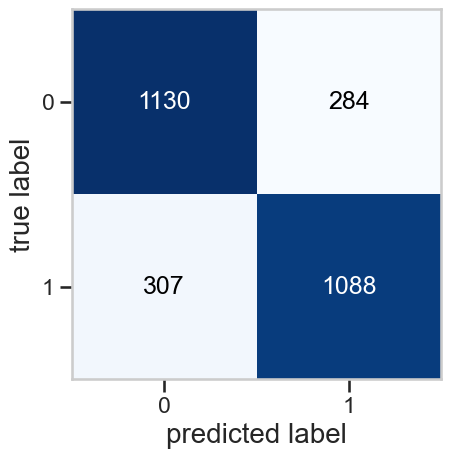

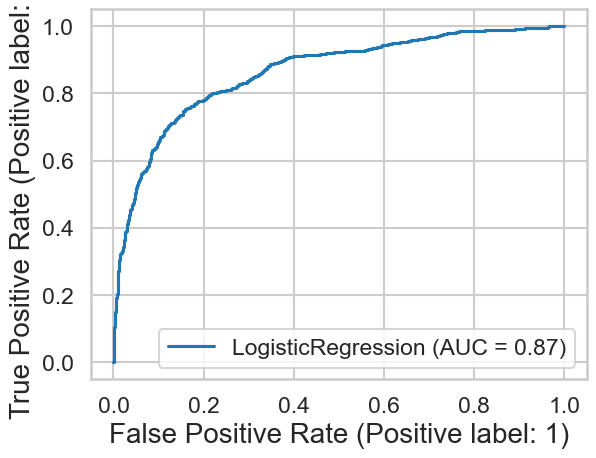

In [628]:
# Logistic regression
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

# Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))

# Calculate ROC AUC
roc_auc1 = roc_auc_score(y_test, y_pred)
print("ROC Area under Curve = {}".format(roc_auc1))

# Display Classification Report
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))

# Plot the ROC curve
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.91776
ROC Area under Curve = 0.9179748850461082
              precision    recall  f1-score   support

           0    0.94642   0.88685   0.91566      1414
           1    0.89218   0.94910   0.91976      1395

    accuracy                        0.91776      2809
   macro avg    0.91930   0.91797   0.91771      2809
weighted avg    0.91948   0.91776   0.91770      2809



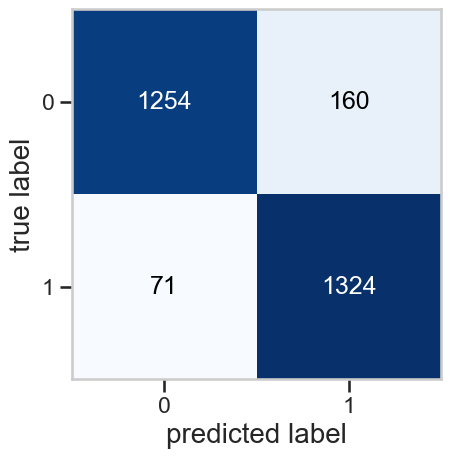

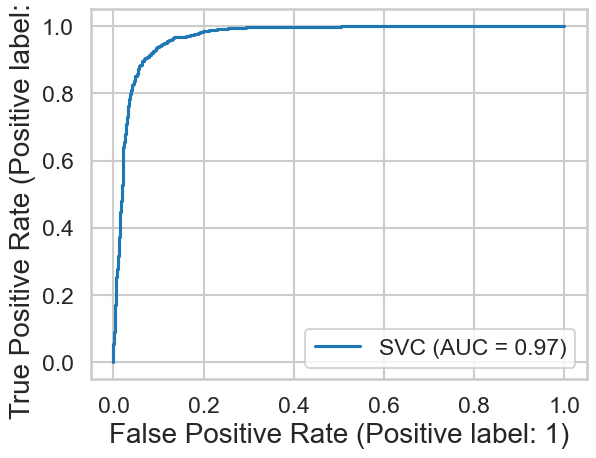

In [629]:
# Support Vector Machine
model=SVC()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

# Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {:.5f}".format(accuracy))

# Calculate ROC AUC
roc_auc2 = roc_auc_score(y_test, y_pred)
print("ROC Area under Curve = {}".format(roc_auc2))

# Plot confusion matrix
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))

# Plot ROC Curve
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.90032
ROC Area under Curve = 0.9006963138710185
              precision    recall  f1-score   support

           0    0.95143   0.84512   0.89513      1414
           1    0.85898   0.95627   0.90502      1395

    accuracy                        0.90032      2809
   macro avg    0.90521   0.90070   0.90008      2809
weighted avg    0.90552   0.90032   0.90004      2809



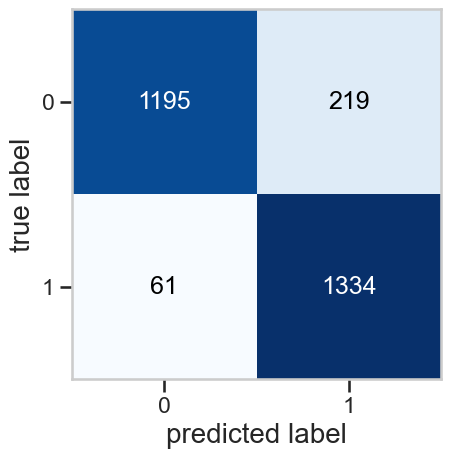

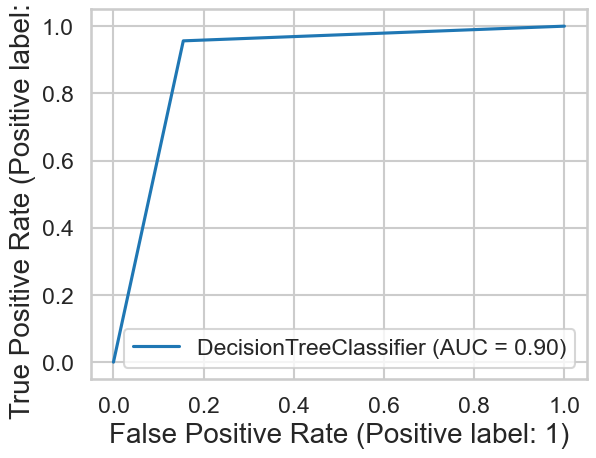

In [630]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

# Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {:.5f}".format(accuracy))

# Calculate ROC AUC
roc_auc3 = roc_auc_score(y_test, y_pred)
print("ROC Area under Curve = {}".format(roc_auc3))

# Displaying the confusion matrix
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))

# Plot ROC Curve
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9775720897116411
ROC Area under Curve = 0.9776794269288681
              precision    recall  f1-score   support

           0    0.99343   0.96181   0.97736      1414
           1    0.96250   0.99355   0.97778      1395

    accuracy                        0.97757      2809
   macro avg    0.97796   0.97768   0.97757      2809
weighted avg    0.97807   0.97757   0.97757      2809



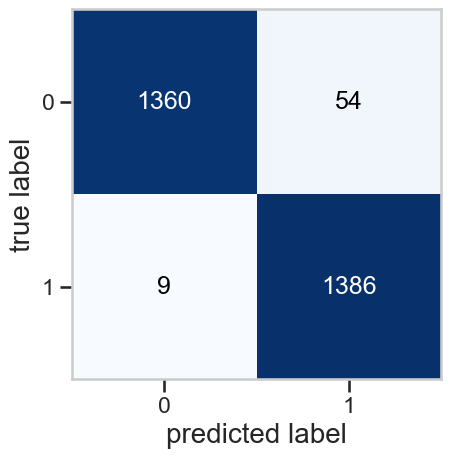

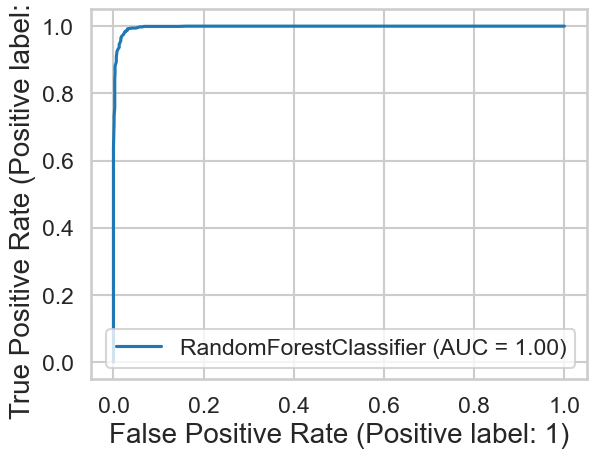

In [631]:
# random forest
model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

# Calculating Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))

# Calculate ROC AUC
roc_auc4 = roc_auc_score(y_test, y_pred)
print("ROC Area under Curve = {}".format(roc_auc4))

# PLot the confusion matrix
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))

# Plot ROC Curve
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9626201495194019
ROC Area under Curve = 0.9628472063796241
              precision    recall  f1-score   support

           0    0.99621   0.92928   0.96158      1414
           1    0.93289   0.99642   0.96360      1395

    accuracy                        0.96262      2809
   macro avg    0.96455   0.96285   0.96259      2809
weighted avg    0.96476   0.96262   0.96259      2809



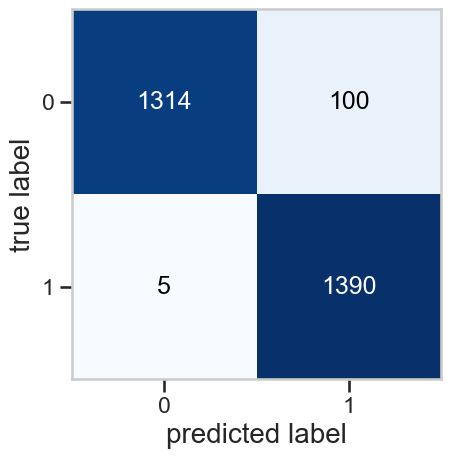

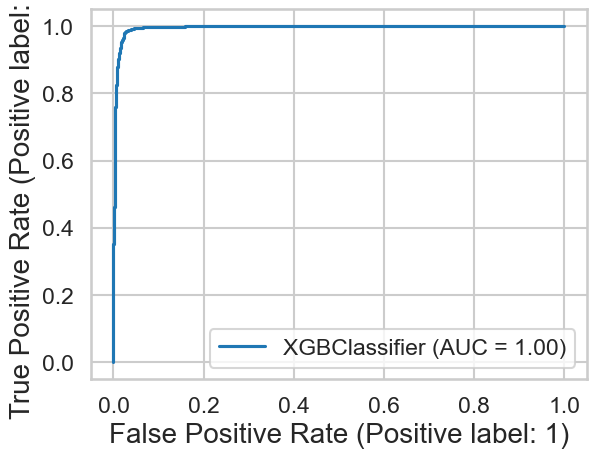

In [632]:
# XGBoost
model=XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)

#Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))

# Calculate ROC AUC
roc_auc5 = roc_auc_score(y_test, y_pred)
print("ROC Area under Curve = {}".format(roc_auc5))

# Plot Confusion matrix
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))

# Plot ROC Curve
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

**Based on the provided metrics, Random Forest appears to be the best algorithm for our use case, as it achieves the highest accuracy and ROC AUC. It also shows balanced precision, recall, and F1-score across both classes.**

# Customer Segmentation Analysis:

## Cluster 0: Engaged Customers

### Characteristics:
- These customers exhibit high loyalty with long tenure and high satisfaction scores.
- They are frequent shoppers with high order counts and significant cashback amounts.

### Retention Strategy:

- Establish a VIP loyalty program exclusively for these customers, offering special discounts, early access to sales, and personalized product recommendations.
- Implement a tiered rewards system where customers can unlock higher tiers with increased benefits based on their purchase history.

### Implementation Plan:

- Launch a VIP loyalty program within the next two months, incorporating personalized communications and rewards.
- Implement a feedback mechanism to gather insights from these customers and tailor the program to their preferences.
- Key Performance Indicators (KPIs): Increase in repeat purchases from VIP members, improvement in customer satisfaction scores, growth in average order value (AOV) among this segment.

## Cluster 1: Digital Enthusiast Customers

### Characteristics: 

- These customers are characterized by high engagement with the mobile app and multiple registered devices.
- They have moderate tenure and satisfaction scores, with a moderate level of order activity.

### Retention Strategy:

- Enhance the mobile app experience by introducing new features such as augmented reality (AR) product visualization, personalized recommendations based on browsing history, and in-app chat support.
- Offer exclusive promotions for tech-related products or services to leverage their interest in technology.

### Implementation Plan:

- Develop and roll out the new app features over the next three months, with regular updates based on user feedback.
- Create targeted marketing campaigns highlighting tech-related promotions and discounts tailored to this segment's preferences.
- Key Performance Indicators (KPIs): Increase in app engagement metrics (time spent, frequency of use), growth in app downloads and active users, improvement in customer retention rate among tech-savvy customers.

## Cluster 2: Moderately Engaged Customers

### Characteristics:

- These customers demonstrate moderate levels of engagement across various metrics, including tenure, satisfaction scores, and order activity.
- They show a balanced approach to shopping, with average order values and coupon usage.

### Retention Strategy:

- Focus on improving customer service and communication channels to strengthen the relationship with this segment.
- Offer targeted promotions and discounts based on their purchase history and preferences to incentivize repeat purchases.

### Implementation Plan:

- Implement a customer feedback system to gather insights and identify areas for improvement in service quality and communication.
- Launch segmented email campaigns offering personalized discounts and recommendations to increase conversion rates.
- Key Performance Indicators (KPIs): Increase in customer satisfaction scores, growth in repeat purchase rate, improvement in customer retention rate among moderately engaged customers.

## Cluster 3: New or Less Engaged Customers

### Characteristics:

- This segment comprises customers with the lowest levels of engagement, including shorter tenure, moderate satisfaction scores, and lower order activity.
- They may represent new customers or those who have not yet fully engaged with the brand.

### Retention Strategy:

- Focus on nurturing new customers with personalized onboarding experiences, including welcome emails, tutorials on using the platform, and first-purchase incentives.
- Implement a referral program to encourage existing customers to introduce friends and family to the brand, incentivizing both parties with discounts or rewards.

### Implementation Plan:

- Develop a comprehensive onboarding process, including a series of welcome emails and in-app tutorials, to guide new customers through their first purchase journey.
- Launch a referral program with incentives for both referrers and referees, promoting it through email campaigns, social media, and in-app notifications.
- Key Performance Indicators (KPIs): Increase in conversion rate of new customers, growth in customer base, improvement in customer lifetime value (CLV) among new or less engaged customers.

## Implementation Plan:

**1. Timeline:**

- VIP loyalty program launch: 2 months.
- Mobile app feature development: 3 months.
- Customer feedback system implementation: ongoing.
- Segmented email campaign rollout: 1 month.

**2. Key Performance Indicators (KPIs):**

- VIP loyalty program: Increase in repeat purchases from VIP members, improvement in customer satisfaction scores, growth in average order value.
- Mobile app enhancements: Increase in app engagement metrics (time spent, frequency of use), growth in app downloads and active users, improvement in customer retention rate among tech-savvy customers.
- Customer service improvements: Increase in customer satisfaction scores, growth in repeat purchase rate, improvement in customer retention rate among moderately engaged customers.
- New customer onboarding and referral program: Increase in conversion rate of new customers, growth in customer base, improvement in customer lifetime value (CLV) among new or less engaged customers.

**3. Retention Strategies:**

- VIP loyalty program: Exclusive benefits, personalized communications, rewards.
- Mobile app enhancements: Personalized recommendations, in-app chat support.
- Customer service improvements: Feedback system, segmented email campaigns, targeted promotions.
- New customer onboarding and referral program: Welcome emails, in-app tutorials, referral incentives.

**4. Monitoring and Evaluation:**

- Regular tracking of KPIs to assess the effectiveness of retention strategies.
- Continuous refinement of strategies based on customer feedback and market trends.
- Quarterly reviews to evaluate progress and make necessary adjustments to the implementation plan.